**Importation des packages**

In [57]:
import sys

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# la ligne ici est ajouté principalement pour SVC dont des mises à jour
# sont annoncées mais jamais mise à jour :)

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


#inflect est une librairie qui permet de convertir les nombres en mots
import inflect
import pickle
import contractions
import unicodedata
from collections import Counter
import math
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import re
import json
import numpy
from time import time
import pandas as pd
import numpy as np 
import sklearn
from sklearn.utils import resample
from sklearn_pandas import DataFrameMapper
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package punkt to /home/anas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/anas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/anas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/anas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
df=pd.read_csv('claim.csv', sep=',')



In [3]:
shapeDF = df.shape
nbLignes, nbColonnes = shapeDF
print("On a", nbLignes, "lignes et", nbColonnes,"colonnes")

print("Cinq premières lignes du dataframe :")
display(df[:5])
# ou :
#display(df.head(5))

print("Information sur le dataframe : ")

print (df.info())

On a 39218 lignes et 23 colonnes
Cinq premières lignes du dataframe :


,Unnamed: 0,claimReview_author,claimReview_author_name,claimReview_author_url,claimReview_claimReviewed,claimReview_datePublished,claimReview_source,claimReview_url,creativeWork_author_name,creativeWork_author_sameAs,...,extra_entities_body,extra_entities_claimReview_claimReviewed,extra_entities_keywords,extra_refered_links,extra_tags,extra_title,rating_alternateName,rating_bestRating,rating_ratingValue,rating_worstRating
0,0,NaN,snopes,NaN,Finnish President Sauli Niinistö posted a vide...,2019-10-07,snopes,https://www.snopes.com/fact-check/president-fi...,NaN,NaN,...,"[{""id"" : 33057"",""""begin"": 46,""end"": 57,""entity...","[{""id"" : 1042690"",""""begin"": 18,""end"": 32,""enti...",[],"https://t.co/Oo5Q56ALAu,https://twitter.com/ia...",NaN,Did the President of Finland Post a Video Resp...,False,NaN,NaN,NaN
1,1,NaN,snopes,NaN,A supporter of U.S. Rep. Alexandria Ocasio-Cor...,2019-10-04,snopes,https://www.snopes.com/fact-check/babies-clima...,NaN,NaN,...,"[{""id"" : 645042"",""""begin"": 33,""end"": 46,""entit...","[{""id"" : 54885332"",""""begin"": 22,""end"": 45,""ent...",[],https://twitter.com/redsteeze/status/117991491...,NaN,Did an AOC Supporter Suggest ‘Eating Babies’ t...,Mixture,NaN,NaN,NaN
2,2,NaN,snopes,NaN,A photograph shows a bride and groom during a ...,2019-10-04,snopes,https://www.snopes.com/fact-check/handmaid-tal...,NaN,NaN,...,"[{""id"" : 50430110"",""""begin"": 91,""end"": 106,""en...","[{""id"" : 50430110"",""""begin"": 46,""end"": 61,""ent...",[],https://twitter.com/God_loves_women/status/117...,NaN,Is This a Photo of a ‘Handmaid’s Tale’-Themed ...,Miscaptioned,NaN,NaN,NaN
3,3,NaN,snopes,NaN,Canada legalized the medicinal use of cocaine.,2019-10-04,snopes,https://www.snopes.com/fact-check/medicinal-co...,NaN,NaN,...,"[{""id"" : 7701"",""""begin"": 96,""end"": 103,""entity...","[{""id"" : 7701"",""""begin"": 38,""end"": 45,""entity""...",[],https://web.archive.org/web/20191004171021/htt...,NaN,Did Canada Legalize the Medicinal Use of Cocaine?,Labeled Satire,NaN,NaN,NaN
4,4,NaN,snopes,NaN,"In September 2019, U.S. President Donald Trump...",2019-10-04,snopes,https://www.snopes.com/fact-check/trump-autism...,NaN,NaN,...,"[{""id"" : 4848272"",""""begin"": 121,""end"": 133,""en...","[{""id"" : 4848272"",""""begin"": 31,""end"": 43,""enti...",[],"http://archive.is/ymlJP,http://archive.is/JgYP...",NaN,Did Donald Trump Sign a $1.8 Billion Autism-Se...,True,NaN,NaN,NaN


Information sur le dataframe : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39218 entries, 0 to 39217
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                39218 non-null  int64  
 1   claimReview_author                        0 non-null      float64
 2   claimReview_author_name                   39218 non-null  object 
 3   claimReview_author_url                    0 non-null      float64
 4   claimReview_claimReviewed                 39216 non-null  object 
 5   claimReview_datePublished                 37913 non-null  object 
 6   claimReview_source                        39218 non-null  object 
 7   claimReview_url                           39218 non-null  object 
 8   creativeWork_author_name                  17481 non-null  object 
 9   creativeWork_author_sameAs                1310 non-null   object 
 10  cr

On peut déjà retirer la colonne Unamed qui ne nous sera pas utile par la suite, elle indexe juste les claims par rapport à la source

In [4]:
df=df.drop("Unnamed: 0", 1)

Nombre de colonne où il y a au moins une valeur nulle : 15



['claimReview_author',
 'claimReview_author_url',
 'claimReview_claimReviewed',
 'claimReview_datePublished',
 'creativeWork_author_name',
 'creativeWork_author_sameAs',
 'creativeWork_datePublished',
 'extra_body',
 'extra_refered_links',
 'extra_tags',
 'extra_title',
 'rating_alternateName',
 'rating_bestRating',
 'rating_ratingValue',
 'rating_worstRating']

Heatmap des valeurs manquantes :


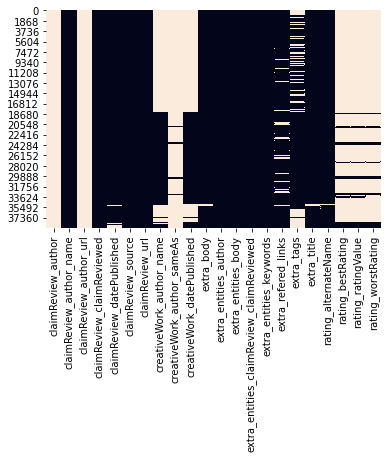

In [5]:
sns.heatmap(df.isnull(), cbar=False)

colonnesNonCompletes = []

for colonne in df.columns.values:
        if(df[colonne].isnull().any()):
            colonnesNonCompletes.append(colonne)

print( "Nombre de colonne où il y a au moins une valeur nulle :", len(colonnesNonCompletes))
print( "")
display(colonnesNonCompletes)

print( "Heatmap des valeurs manquantes :")

<H1> Pré-traitement </H1>

La première phase du projet consiste à faire du feature engineering. C'est à dire qu'il faudra utiliser des méthodes de traitement de données afin de préparer notre dataset à la phase de classification.

**Attribution des valeurs de classe**

On choisit dans un premier temps d'utiliser la méthode de classification suivante : 
{VRAI} vs. {FAUX}

On va alors parcourir la colonne 'rating_alternateName' puis attribuer la valeur '1' pour toutes les assertions 'True' et 0 pour tout le reste. On admet que si ce n'est pas entièrement true, c'est false.

In [6]:
df2 = df.copy()
print(nbLignes)
indexAlternateName = 0
while indexAlternateName < nbLignes:
    phrase = df['rating_alternateName'][indexAlternateName]
    
    #key = df['extra_entities_keywords'][indexAlternateName]
    if  isinstance(phrase, str):
        #tokenization de la phrase
        tokens = word_tokenize(phrase)

        #mise en minuscules 
        tokens = [w.lower() for w in tokens]
        
        if tokens[0] == "true":
            #print("True")
            df2['rating_alternateName'][indexAlternateName] = 1
            
        else:
            df2['rating_alternateName'][indexAlternateName] = 0
            #print(indexAlternateName, " : ", tokens)
    #else:
        #print(indexAlternateName, " : entrée vide")
    #if  isinstance(key, str): #recuperer le sujet de la phrase
        #print(key)
    indexAlternateName+=1
    
indexAlternateName2 = 0
while indexAlternateName2 < nbLignes:
    sujet = df['extra_tags'][indexAlternateName2]
    
    if  isinstance(sujet, str): #recuperer le sujet de la phrase
        x = sujet.split(",")
        #print(indexAlternateName, " : ", x[0])
        df2['extra_tags'][indexAlternateName2] = x[0]
        #print(df2['extra_tags'][indexAlternateName2])
    else : 
        df2 = df2.drop([indexAlternateName2], axis = 0)
    indexAlternateName2+=1
df2.reset_index(drop=True, inplace=True)
    

39218


/home/anas/Bureau/m1-aigle-s2/HMIN232M-DataScienceMethods/env/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/anas/Bureau/m1-aigle-s2/HMIN232M-DataScienceMethods/env/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/anas/Bureau/m1-aigle-s2/HMIN232M-DataScienceMethods/env/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

**Affichage des résultats**

On affiche le nombre d'assertions true/false (attribut rating_alternateName) avec countplot.

Pour nous :
- Une assertion vraie est attribuée à la valeur 1
- Une assertion non vraie est attribuée à la valeur 0

In [7]:
df2.rating_alternateName

0        0
1        0
2        0
3        0
4        0
        ..
30234    1
30235    0
30236    0
30237    0
30238    0
Name: rating_alternateName, Length: 30239, dtype: object

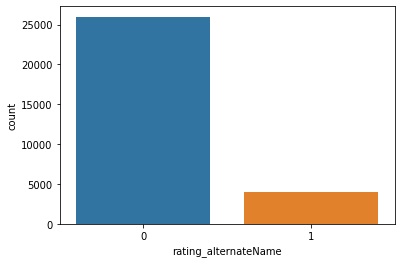

In [8]:
sns.countplot(x='rating_alternateName', data=df2)

**Transformation des phrases d'assertions**



On commence par lancer un processus de transformation sur la colonne 'claimReview_claimReviewed' :

In [9]:
shapeDF = df2.shape
nbLignes, nbColonnes = shapeDF

def replace_contractions(text):
    return contractions.fix(text)

def remove_non_ascii(text):
    new_words = []
    for word in text:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return text

def replace_digits(text):
    p = inflect.engine()
    indiceWord = 0
    tokens2 = ""
    for word in text:
        if word.isdigit():
            text[indiceWord] = p.number_to_words(word)
            phrase2 = sent_tokenize(text[indiceWord])
            tokens2 = word_tokenize(phrase2[0]) #tokenisation de la conversion du digit
            text = text[:indiceWord] + tokens2 + text[indiceWord+1:]
        indiceWord+=1
    return text

def lemmatisation_text(text):
    #Lemmatisation
    wordnet_lemmatizer = WordNetLemmatizer()
    text = [wordnet_lemmatizer.lemmatize(word,pos='v') for word in text]
    return text

def stemmatisation_text(text):
    #Stemmatisation
    porter = PorterStemmer()
    text = [porter.stem(word) for word in text]
    return text

def pos_tag_text(text):
    text = nltk.pos_tag(text)
    return text

def clean_text(text):
    #on supprime les contractions
    text = replace_contractions(text)
    #on tokenize la phrase
    text = word_tokenize(text)
    #on remplace les chiffres par leur équivalent écrit en lettres
    text = replace_digits(text) 
    #mise en minuscules 
    text = [w.lower() for w in text]
    #suppression des ponctuations
    text = [word for word in text if word.isalpha()] 
     #suppression des stop words
    stop_words = set(stopwords.words('english'))
    text = [w for w in text if not w in stop_words] 
    #Stemmatisation
    text = stemmatisation_text(text)
    #On remet le texte sous forme d'une phrase
    text="".join([" "+i for i in text]).strip()
    return text

#on traite chaque ligne de la colonne 'claimReview_claimReviewed'

cleanClaimsLms = []

print("Pré-traitement en cours...")
t0 = time()
indexClaimReviewed=0
while indexClaimReviewed < nbLignes:
    ligne = df['claimReview_claimReviewed'][indexClaimReviewed]
    print("Progression : ",indexClaimReviewed,"/",nbLignes, end="\r")
    #On vérifie si la ligne est bien une chaîne de caractères 'str' non vide, autrement on la supprime du dataset
    if isinstance(ligne, str) and ligne:
        #On découpe en phrase pour prendre la première, qui correspond à l'assertion
        phrase = sent_tokenize(ligne)[0]
        
        phrase = clean_text(phrase)
        
        cleanClaimsLms.append(phrase)     
           
    #Dans le cas d'une claim vide, on enlève toute la ligne comme elle ne pourra pas nous être utile
    else:       
        #On supprime toute l'entrée
        df2 = df2.drop(df2.index[indexClaimReviewed])
        
    indexClaimReviewed+=1
    
print("Pré-traitement terminée en %0.3fs" % (time() - t0))
#On ré-assigne les index pour re-synchroniser les entrées supprimées   
df2.reset_index(drop=True, inplace=True)


Pré-traitement en cours...
Pré-traitement terminée en 34.051s2394521 / 30239/ 3023915391 / 3023916164 / 3023930239/ 30239/ 30239


In [10]:
#On crée une nouvelle colonne avec les claims nettoyées
df2['claimReview_Cleaned'] = cleanClaimsLms   


In [11]:
display(df2['claimReview_Cleaned'].sample(5))

6867     monica lewinski offer take one team perform or...
782      trump administr seek monitor social media post...
2864     meme present accur describ japan healthcar hea...
19040             saudi arabia militari budget entir world
6923     nypd raid clinton properti part anthoni weiner...
Name: claimReview_Cleaned, dtype: object

On stocke le résultat de la transformation dans une nouvelle colonne du dataframe 'df2' qui va nous servir plus tard pour la classification. (On garde les données originales dans 'df')

**Extractions des URLs**

In [12]:
def get_urls_from_text(text):
    domain2=re.findall('https?:\/\/(?:www\.)?([^\/]+)', text)
    #print("Url : " + url)
    urls = []
    #suppression des doublons
    for j in domain2:
        if j not in urls:
            urls.append(j)
    #url ="".join([" "+i for i in urls]).strip()
    #return url
    if(len(urls) > 1):
        return urls[0]
    else:
        return "NaN"
    

minimized_urls = []
idx = 0
t0 = time()
nbLignes, nbColonnes = df2.shape

print("Traitement des urls en cours...")

while idx < nbLignes:
    print("Ligne ",idx)
    url = df2['extra_refered_links'][idx]
    if isinstance(url, str) and url:
        url = sent_tokenize(url)[0]
        url = get_urls_from_text(url)
        minimized_urls.append(url)
    else:
        minimized_urls.append("")
        
    idx+=1
print("Traitement des urls terminé en %0.3fs" % (time() - t0))

Traitement des urls en cours...
Ligne  0
Ligne  1
Ligne  2
Ligne  3
Ligne  4
Ligne  5
Ligne  6
Ligne  7
Ligne  8
Ligne  9
Ligne  10
Ligne  11
Ligne  12
Ligne  13
Ligne  14
Ligne  15
Ligne  16
Ligne  17
Ligne  18
Ligne  19
Ligne  20
Ligne  21
Ligne  22
Ligne  23
Ligne  24
Ligne  25
Ligne  26
Ligne  27
Ligne  28
Ligne  29
Ligne  30
Ligne  31
Ligne  32
Ligne  33
Ligne  34
Ligne  35
Ligne  36
Ligne  37
Ligne  38
Ligne  39
Ligne  40
Ligne  41
Ligne  42
Ligne  43
Ligne  44
Ligne  45
Ligne  46
Ligne  47
Ligne  48
Ligne  49
Ligne  50
Ligne  51
Ligne  52
Ligne  53
Ligne  54
Ligne  55
Ligne  56
Ligne  57
Ligne  58
Ligne  59
Ligne  60
Ligne  61
Ligne  62
Ligne  63
Ligne  64
Ligne  65
Ligne  66
Ligne  67
Ligne  68
Ligne  69
Ligne  70
Ligne  71
Ligne  72
Ligne  73
Ligne  74
Ligne  75
Ligne  76
Ligne  77
Ligne  78
Ligne  79
Ligne  80
Ligne  81
Ligne  82
Ligne  83
Ligne  84
Ligne  85
Ligne  86
Ligne  87
Ligne  88
Ligne  89
Ligne  90
Ligne  91
Ligne  92
Ligne  93
Ligne  94
Ligne  95
Ligne  96
Ligne  9

Ligne  786
Ligne  787
Ligne  788
Ligne  789
Ligne  790
Ligne  791
Ligne  792
Ligne  793
Ligne  794
Ligne  795
Ligne  796
Ligne  797
Ligne  798
Ligne  799
Ligne  800
Ligne  801
Ligne  802
Ligne  803
Ligne  804
Ligne  805
Ligne  806
Ligne  807
Ligne  808
Ligne  809
Ligne  810
Ligne  811
Ligne  812
Ligne  813
Ligne  814
Ligne  815
Ligne  816
Ligne  817
Ligne  818
Ligne  819
Ligne  820
Ligne  821
Ligne  822
Ligne  823
Ligne  824
Ligne  825
Ligne  826
Ligne  827
Ligne  828
Ligne  829
Ligne  830
Ligne  831
Ligne  832
Ligne  833
Ligne  834
Ligne  835
Ligne  836
Ligne  837
Ligne  838
Ligne  839
Ligne  840
Ligne  841
Ligne  842
Ligne  843
Ligne  844
Ligne  845
Ligne  846
Ligne  847
Ligne  848
Ligne  849
Ligne  850
Ligne  851
Ligne  852
Ligne  853
Ligne  854
Ligne  855
Ligne  856
Ligne  857
Ligne  858
Ligne  859
Ligne  860
Ligne  861
Ligne  862
Ligne  863
Ligne  864
Ligne  865
Ligne  866
Ligne  867
Ligne  868
Ligne  869
Ligne  870
Ligne  871
Ligne  872
Ligne  873
Ligne  874
Ligne  875
Ligne  876

Ligne  1512
Ligne  1513
Ligne  1514
Ligne  1515
Ligne  1516
Ligne  1517
Ligne  1518
Ligne  1519
Ligne  1520
Ligne  1521
Ligne  1522
Ligne  1523
Ligne  1524
Ligne  1525
Ligne  1526
Ligne  1527
Ligne  1528
Ligne  1529
Ligne  1530
Ligne  1531
Ligne  1532
Ligne  1533
Ligne  1534
Ligne  1535
Ligne  1536
Ligne  1537
Ligne  1538
Ligne  1539
Ligne  1540
Ligne  1541
Ligne  1542
Ligne  1543
Ligne  1544
Ligne  1545
Ligne  1546
Ligne  1547
Ligne  1548
Ligne  1549
Ligne  1550
Ligne  1551
Ligne  1552
Ligne  1553
Ligne  1554
Ligne  1555
Ligne  1556
Ligne  1557
Ligne  1558
Ligne  1559
Ligne  1560
Ligne  1561
Ligne  1562
Ligne  1563
Ligne  1564
Ligne  1565
Ligne  1566
Ligne  1567
Ligne  1568
Ligne  1569
Ligne  1570
Ligne  1571
Ligne  1572
Ligne  1573
Ligne  1574
Ligne  1575
Ligne  1576
Ligne  1577
Ligne  1578
Ligne  1579
Ligne  1580
Ligne  1581
Ligne  1582
Ligne  1583
Ligne  1584
Ligne  1585
Ligne  1586
Ligne  1587
Ligne  1588
Ligne  1589
Ligne  1590
Ligne  1591
Ligne  1592
Ligne  1593
Ligne  1594
Lign

Ligne  2210
Ligne  2211
Ligne  2212
Ligne  2213
Ligne  2214
Ligne  2215
Ligne  2216
Ligne  2217
Ligne  2218
Ligne  2219
Ligne  2220
Ligne  2221
Ligne  2222
Ligne  2223
Ligne  2224
Ligne  2225
Ligne  2226
Ligne  2227
Ligne  2228
Ligne  2229
Ligne  2230
Ligne  2231
Ligne  2232
Ligne  2233
Ligne  2234
Ligne  2235
Ligne  2236
Ligne  2237
Ligne  2238
Ligne  2239
Ligne  2240
Ligne  2241
Ligne  2242
Ligne  2243
Ligne  2244
Ligne  2245
Ligne  2246
Ligne  2247
Ligne  2248
Ligne  2249
Ligne  2250
Ligne  2251
Ligne  2252
Ligne  2253
Ligne  2254
Ligne  2255
Ligne  2256
Ligne  2257
Ligne  2258
Ligne  2259
Ligne  2260
Ligne  2261
Ligne  2262
Ligne  2263
Ligne  2264
Ligne  2265
Ligne  2266
Ligne  2267
Ligne  2268
Ligne  2269
Ligne  2270
Ligne  2271
Ligne  2272
Ligne  2273
Ligne  2274
Ligne  2275
Ligne  2276
Ligne  2277
Ligne  2278
Ligne  2279
Ligne  2280
Ligne  2281
Ligne  2282
Ligne  2283
Ligne  2284
Ligne  2285
Ligne  2286
Ligne  2287
Ligne  2288
Ligne  2289
Ligne  2290
Ligne  2291
Ligne  2292
Lign

Ligne  2973
Ligne  2974
Ligne  2975
Ligne  2976
Ligne  2977
Ligne  2978
Ligne  2979
Ligne  2980
Ligne  2981
Ligne  2982
Ligne  2983
Ligne  2984
Ligne  2985
Ligne  2986
Ligne  2987
Ligne  2988
Ligne  2989
Ligne  2990
Ligne  2991
Ligne  2992
Ligne  2993
Ligne  2994
Ligne  2995
Ligne  2996
Ligne  2997
Ligne  2998
Ligne  2999
Ligne  3000
Ligne  3001
Ligne  3002
Ligne  3003
Ligne  3004
Ligne  3005
Ligne  3006
Ligne  3007
Ligne  3008
Ligne  3009
Ligne  3010
Ligne  3011
Ligne  3012
Ligne  3013
Ligne  3014
Ligne  3015
Ligne  3016
Ligne  3017
Ligne  3018
Ligne  3019
Ligne  3020
Ligne  3021
Ligne  3022
Ligne  3023
Ligne  3024
Ligne  3025
Ligne  3026
Ligne  3027
Ligne  3028
Ligne  3029
Ligne  3030
Ligne  3031
Ligne  3032
Ligne  3033
Ligne  3034
Ligne  3035
Ligne  3036
Ligne  3037
Ligne  3038
Ligne  3039
Ligne  3040
Ligne  3041
Ligne  3042
Ligne  3043
Ligne  3044
Ligne  3045
Ligne  3046
Ligne  3047
Ligne  3048
Ligne  3049
Ligne  3050
Ligne  3051
Ligne  3052
Ligne  3053
Ligne  3054
Ligne  3055
Lign

Ligne  3728
Ligne  3729
Ligne  3730
Ligne  3731
Ligne  3732
Ligne  3733
Ligne  3734
Ligne  3735
Ligne  3736
Ligne  3737
Ligne  3738
Ligne  3739
Ligne  3740
Ligne  3741
Ligne  3742
Ligne  3743
Ligne  3744
Ligne  3745
Ligne  3746
Ligne  3747
Ligne  3748
Ligne  3749
Ligne  3750
Ligne  3751
Ligne  3752
Ligne  3753
Ligne  3754
Ligne  3755
Ligne  3756
Ligne  3757
Ligne  3758
Ligne  3759
Ligne  3760
Ligne  3761
Ligne  3762
Ligne  3763
Ligne  3764
Ligne  3765
Ligne  3766
Ligne  3767
Ligne  3768
Ligne  3769
Ligne  3770
Ligne  3771
Ligne  3772
Ligne  3773
Ligne  3774
Ligne  3775
Ligne  3776
Ligne  3777
Ligne  3778
Ligne  3779
Ligne  3780
Ligne  3781
Ligne  3782
Ligne  3783
Ligne  3784
Ligne  3785
Ligne  3786
Ligne  3787
Ligne  3788
Ligne  3789
Ligne  3790
Ligne  3791
Ligne  3792
Ligne  3793
Ligne  3794
Ligne  3795
Ligne  3796
Ligne  3797
Ligne  3798
Ligne  3799
Ligne  3800
Ligne  3801
Ligne  3802
Ligne  3803
Ligne  3804
Ligne  3805
Ligne  3806
Ligne  3807
Ligne  3808
Ligne  3809
Ligne  3810
Lign

Ligne  4464
Ligne  4465
Ligne  4466
Ligne  4467
Ligne  4468
Ligne  4469
Ligne  4470
Ligne  4471
Ligne  4472
Ligne  4473
Ligne  4474
Ligne  4475
Ligne  4476
Ligne  4477
Ligne  4478
Ligne  4479
Ligne  4480
Ligne  4481
Ligne  4482
Ligne  4483
Ligne  4484
Ligne  4485
Ligne  4486
Ligne  4487
Ligne  4488
Ligne  4489
Ligne  4490
Ligne  4491
Ligne  4492
Ligne  4493
Ligne  4494
Ligne  4495
Ligne  4496
Ligne  4497
Ligne  4498
Ligne  4499
Ligne  4500
Ligne  4501
Ligne  4502
Ligne  4503
Ligne  4504
Ligne  4505
Ligne  4506
Ligne  4507
Ligne  4508
Ligne  4509
Ligne  4510
Ligne  4511
Ligne  4512
Ligne  4513
Ligne  4514
Ligne  4515
Ligne  4516
Ligne  4517
Ligne  4518
Ligne  4519
Ligne  4520
Ligne  4521
Ligne  4522
Ligne  4523
Ligne  4524
Ligne  4525
Ligne  4526
Ligne  4527
Ligne  4528
Ligne  4529
Ligne  4530
Ligne  4531
Ligne  4532
Ligne  4533
Ligne  4534
Ligne  4535
Ligne  4536
Ligne  4537
Ligne  4538
Ligne  4539
Ligne  4540
Ligne  4541
Ligne  4542
Ligne  4543
Ligne  4544
Ligne  4545
Ligne  4546
Lign

Ligne  5222
Ligne  5223
Ligne  5224
Ligne  5225
Ligne  5226
Ligne  5227
Ligne  5228
Ligne  5229
Ligne  5230
Ligne  5231
Ligne  5232
Ligne  5233
Ligne  5234
Ligne  5235
Ligne  5236
Ligne  5237
Ligne  5238
Ligne  5239
Ligne  5240
Ligne  5241
Ligne  5242
Ligne  5243
Ligne  5244
Ligne  5245
Ligne  5246
Ligne  5247
Ligne  5248
Ligne  5249
Ligne  5250
Ligne  5251
Ligne  5252
Ligne  5253
Ligne  5254
Ligne  5255
Ligne  5256
Ligne  5257
Ligne  5258
Ligne  5259
Ligne  5260
Ligne  5261
Ligne  5262
Ligne  5263
Ligne  5264
Ligne  5265
Ligne  5266
Ligne  5267
Ligne  5268
Ligne  5269
Ligne  5270
Ligne  5271
Ligne  5272
Ligne  5273
Ligne  5274
Ligne  5275
Ligne  5276
Ligne  5277
Ligne  5278
Ligne  5279
Ligne  5280
Ligne  5281
Ligne  5282
Ligne  5283
Ligne  5284
Ligne  5285
Ligne  5286
Ligne  5287
Ligne  5288
Ligne  5289
Ligne  5290
Ligne  5291
Ligne  5292
Ligne  5293
Ligne  5294
Ligne  5295
Ligne  5296
Ligne  5297
Ligne  5298
Ligne  5299
Ligne  5300
Ligne  5301
Ligne  5302
Ligne  5303
Ligne  5304
Lign

Ligne  5905
Ligne  5906
Ligne  5907
Ligne  5908
Ligne  5909
Ligne  5910
Ligne  5911
Ligne  5912
Ligne  5913
Ligne  5914
Ligne  5915
Ligne  5916
Ligne  5917
Ligne  5918
Ligne  5919
Ligne  5920
Ligne  5921
Ligne  5922
Ligne  5923
Ligne  5924
Ligne  5925
Ligne  5926
Ligne  5927
Ligne  5928
Ligne  5929
Ligne  5930
Ligne  5931
Ligne  5932
Ligne  5933
Ligne  5934
Ligne  5935
Ligne  5936
Ligne  5937
Ligne  5938
Ligne  5939
Ligne  5940
Ligne  5941
Ligne  5942
Ligne  5943
Ligne  5944
Ligne  5945
Ligne  5946
Ligne  5947
Ligne  5948
Ligne  5949
Ligne  5950
Ligne  5951
Ligne  5952
Ligne  5953
Ligne  5954
Ligne  5955
Ligne  5956
Ligne  5957
Ligne  5958
Ligne  5959
Ligne  5960
Ligne  5961
Ligne  5962
Ligne  5963
Ligne  5964
Ligne  5965
Ligne  5966
Ligne  5967
Ligne  5968
Ligne  5969
Ligne  5970
Ligne  5971
Ligne  5972
Ligne  5973
Ligne  5974
Ligne  5975
Ligne  5976
Ligne  5977
Ligne  5978
Ligne  5979
Ligne  5980
Ligne  5981
Ligne  5982
Ligne  5983
Ligne  5984
Ligne  5985
Ligne  5986
Ligne  5987
Lign

Ligne  6788
Ligne  6789
Ligne  6790
Ligne  6791
Ligne  6792
Ligne  6793
Ligne  6794
Ligne  6795
Ligne  6796
Ligne  6797
Ligne  6798
Ligne  6799
Ligne  6800
Ligne  6801
Ligne  6802
Ligne  6803
Ligne  6804
Ligne  6805
Ligne  6806
Ligne  6807
Ligne  6808
Ligne  6809
Ligne  6810
Ligne  6811
Ligne  6812
Ligne  6813
Ligne  6814
Ligne  6815
Ligne  6816
Ligne  6817
Ligne  6818
Ligne  6819
Ligne  6820
Ligne  6821
Ligne  6822
Ligne  6823
Ligne  6824
Ligne  6825
Ligne  6826
Ligne  6827
Ligne  6828
Ligne  6829
Ligne  6830
Ligne  6831
Ligne  6832
Ligne  6833
Ligne  6834
Ligne  6835
Ligne  6836
Ligne  6837
Ligne  6838
Ligne  6839
Ligne  6840
Ligne  6841
Ligne  6842
Ligne  6843
Ligne  6844
Ligne  6845
Ligne  6846
Ligne  6847
Ligne  6848
Ligne  6849
Ligne  6850
Ligne  6851
Ligne  6852
Ligne  6853
Ligne  6854
Ligne  6855
Ligne  6856
Ligne  6857
Ligne  6858
Ligne  6859
Ligne  6860
Ligne  6861
Ligne  6862
Ligne  6863
Ligne  6864
Ligne  6865
Ligne  6866
Ligne  6867
Ligne  6868
Ligne  6869
Ligne  6870
Lign

Ligne  7658
Ligne  7659
Ligne  7660
Ligne  7661
Ligne  7662
Ligne  7663
Ligne  7664
Ligne  7665
Ligne  7666
Ligne  7667
Ligne  7668
Ligne  7669
Ligne  7670
Ligne  7671
Ligne  7672
Ligne  7673
Ligne  7674
Ligne  7675
Ligne  7676
Ligne  7677
Ligne  7678
Ligne  7679
Ligne  7680
Ligne  7681
Ligne  7682
Ligne  7683
Ligne  7684
Ligne  7685
Ligne  7686
Ligne  7687
Ligne  7688
Ligne  7689
Ligne  7690
Ligne  7691
Ligne  7692
Ligne  7693
Ligne  7694
Ligne  7695
Ligne  7696
Ligne  7697
Ligne  7698
Ligne  7699
Ligne  7700
Ligne  7701
Ligne  7702
Ligne  7703
Ligne  7704
Ligne  7705
Ligne  7706
Ligne  7707
Ligne  7708
Ligne  7709
Ligne  7710
Ligne  7711
Ligne  7712
Ligne  7713
Ligne  7714
Ligne  7715
Ligne  7716
Ligne  7717
Ligne  7718
Ligne  7719
Ligne  7720
Ligne  7721
Ligne  7722
Ligne  7723
Ligne  7724
Ligne  7725
Ligne  7726
Ligne  7727
Ligne  7728
Ligne  7729
Ligne  7730
Ligne  7731
Ligne  7732
Ligne  7733
Ligne  7734
Ligne  7735
Ligne  7736
Ligne  7737
Ligne  7738
Ligne  7739
Ligne  7740
Lign

Ligne  8601
Ligne  8602
Ligne  8603
Ligne  8604
Ligne  8605
Ligne  8606
Ligne  8607
Ligne  8608
Ligne  8609
Ligne  8610
Ligne  8611
Ligne  8612
Ligne  8613
Ligne  8614
Ligne  8615
Ligne  8616
Ligne  8617
Ligne  8618
Ligne  8619
Ligne  8620
Ligne  8621
Ligne  8622
Ligne  8623
Ligne  8624
Ligne  8625
Ligne  8626
Ligne  8627
Ligne  8628
Ligne  8629
Ligne  8630
Ligne  8631
Ligne  8632
Ligne  8633
Ligne  8634
Ligne  8635
Ligne  8636
Ligne  8637
Ligne  8638
Ligne  8639
Ligne  8640
Ligne  8641
Ligne  8642
Ligne  8643
Ligne  8644
Ligne  8645
Ligne  8646
Ligne  8647
Ligne  8648
Ligne  8649
Ligne  8650
Ligne  8651
Ligne  8652
Ligne  8653
Ligne  8654
Ligne  8655
Ligne  8656
Ligne  8657
Ligne  8658
Ligne  8659
Ligne  8660
Ligne  8661
Ligne  8662
Ligne  8663
Ligne  8664
Ligne  8665
Ligne  8666
Ligne  8667
Ligne  8668
Ligne  8669
Ligne  8670
Ligne  8671
Ligne  8672
Ligne  8673
Ligne  8674
Ligne  8675
Ligne  8676
Ligne  8677
Ligne  8678
Ligne  8679
Ligne  8680
Ligne  8681
Ligne  8682
Ligne  8683
Lign

Ligne  9291
Ligne  9292
Ligne  9293
Ligne  9294
Ligne  9295
Ligne  9296
Ligne  9297
Ligne  9298
Ligne  9299
Ligne  9300
Ligne  9301
Ligne  9302
Ligne  9303
Ligne  9304
Ligne  9305
Ligne  9306
Ligne  9307
Ligne  9308
Ligne  9309
Ligne  9310
Ligne  9311
Ligne  9312
Ligne  9313
Ligne  9314
Ligne  9315
Ligne  9316
Ligne  9317
Ligne  9318
Ligne  9319
Ligne  9320
Ligne  9321
Ligne  9322
Ligne  9323
Ligne  9324
Ligne  9325
Ligne  9326
Ligne  9327
Ligne  9328
Ligne  9329
Ligne  9330
Ligne  9331
Ligne  9332
Ligne  9333
Ligne  9334
Ligne  9335
Ligne  9336
Ligne  9337
Ligne  9338
Ligne  9339
Ligne  9340
Ligne  9341
Ligne  9342
Ligne  9343
Ligne  9344
Ligne  9345
Ligne  9346
Ligne  9347
Ligne  9348
Ligne  9349
Ligne  9350
Ligne  9351
Ligne  9352
Ligne  9353
Ligne  9354
Ligne  9355
Ligne  9356
Ligne  9357
Ligne  9358
Ligne  9359
Ligne  9360
Ligne  9361
Ligne  9362
Ligne  9363
Ligne  9364
Ligne  9365
Ligne  9366
Ligne  9367
Ligne  9368
Ligne  9369
Ligne  9370
Ligne  9371
Ligne  9372
Ligne  9373
Lign

Ligne  10111
Ligne  10112
Ligne  10113
Ligne  10114
Ligne  10115
Ligne  10116
Ligne  10117
Ligne  10118
Ligne  10119
Ligne  10120
Ligne  10121
Ligne  10122
Ligne  10123
Ligne  10124
Ligne  10125
Ligne  10126
Ligne  10127
Ligne  10128
Ligne  10129
Ligne  10130
Ligne  10131
Ligne  10132
Ligne  10133
Ligne  10134
Ligne  10135
Ligne  10136
Ligne  10137
Ligne  10138
Ligne  10139
Ligne  10140
Ligne  10141
Ligne  10142
Ligne  10143
Ligne  10144
Ligne  10145
Ligne  10146
Ligne  10147
Ligne  10148
Ligne  10149
Ligne  10150
Ligne  10151
Ligne  10152
Ligne  10153
Ligne  10154
Ligne  10155
Ligne  10156
Ligne  10157
Ligne  10158
Ligne  10159
Ligne  10160
Ligne  10161
Ligne  10162
Ligne  10163
Ligne  10164
Ligne  10165
Ligne  10166
Ligne  10167
Ligne  10168
Ligne  10169
Ligne  10170
Ligne  10171
Ligne  10172
Ligne  10173
Ligne  10174
Ligne  10175
Ligne  10176
Ligne  10177
Ligne  10178
Ligne  10179
Ligne  10180
Ligne  10181
Ligne  10182
Ligne  10183
Ligne  10184
Ligne  10185
Ligne  10186
Ligne  10187

Ligne  10998
Ligne  10999
Ligne  11000
Ligne  11001
Ligne  11002
Ligne  11003
Ligne  11004
Ligne  11005
Ligne  11006
Ligne  11007
Ligne  11008
Ligne  11009
Ligne  11010
Ligne  11011
Ligne  11012
Ligne  11013
Ligne  11014
Ligne  11015
Ligne  11016
Ligne  11017
Ligne  11018
Ligne  11019
Ligne  11020
Ligne  11021
Ligne  11022
Ligne  11023
Ligne  11024
Ligne  11025
Ligne  11026
Ligne  11027
Ligne  11028
Ligne  11029
Ligne  11030
Ligne  11031
Ligne  11032
Ligne  11033
Ligne  11034
Ligne  11035
Ligne  11036
Ligne  11037
Ligne  11038
Ligne  11039
Ligne  11040
Ligne  11041
Ligne  11042
Ligne  11043
Ligne  11044
Ligne  11045
Ligne  11046
Ligne  11047
Ligne  11048
Ligne  11049
Ligne  11050
Ligne  11051
Ligne  11052
Ligne  11053
Ligne  11054
Ligne  11055
Ligne  11056
Ligne  11057
Ligne  11058
Ligne  11059
Ligne  11060
Ligne  11061
Ligne  11062
Ligne  11063
Ligne  11064
Ligne  11065
Ligne  11066
Ligne  11067
Ligne  11068
Ligne  11069
Ligne  11070
Ligne  11071
Ligne  11072
Ligne  11073
Ligne  11074

Ligne  11906
Ligne  11907
Ligne  11908
Ligne  11909
Ligne  11910
Ligne  11911
Ligne  11912
Ligne  11913
Ligne  11914
Ligne  11915
Ligne  11916
Ligne  11917
Ligne  11918
Ligne  11919
Ligne  11920
Ligne  11921
Ligne  11922
Ligne  11923
Ligne  11924
Ligne  11925
Ligne  11926
Ligne  11927
Ligne  11928
Ligne  11929
Ligne  11930
Ligne  11931
Ligne  11932
Ligne  11933
Ligne  11934
Ligne  11935
Ligne  11936
Ligne  11937
Ligne  11938
Ligne  11939
Ligne  11940
Ligne  11941
Ligne  11942
Ligne  11943
Ligne  11944
Ligne  11945
Ligne  11946
Ligne  11947
Ligne  11948
Ligne  11949
Ligne  11950
Ligne  11951
Ligne  11952
Ligne  11953
Ligne  11954
Ligne  11955
Ligne  11956
Ligne  11957
Ligne  11958
Ligne  11959
Ligne  11960
Ligne  11961
Ligne  11962
Ligne  11963
Ligne  11964
Ligne  11965
Ligne  11966
Ligne  11967
Ligne  11968
Ligne  11969
Ligne  11970
Ligne  11971
Ligne  11972
Ligne  11973
Ligne  11974
Ligne  11975
Ligne  11976
Ligne  11977
Ligne  11978
Ligne  11979
Ligne  11980
Ligne  11981
Ligne  11982

Ligne  12596
Ligne  12597
Ligne  12598
Ligne  12599
Ligne  12600
Ligne  12601
Ligne  12602
Ligne  12603
Ligne  12604
Ligne  12605
Ligne  12606
Ligne  12607
Ligne  12608
Ligne  12609
Ligne  12610
Ligne  12611
Ligne  12612
Ligne  12613
Ligne  12614
Ligne  12615
Ligne  12616
Ligne  12617
Ligne  12618
Ligne  12619
Ligne  12620
Ligne  12621
Ligne  12622
Ligne  12623
Ligne  12624
Ligne  12625
Ligne  12626
Ligne  12627
Ligne  12628
Ligne  12629
Ligne  12630
Ligne  12631
Ligne  12632
Ligne  12633
Ligne  12634
Ligne  12635
Ligne  12636
Ligne  12637
Ligne  12638
Ligne  12639
Ligne  12640
Ligne  12641
Ligne  12642
Ligne  12643
Ligne  12644
Ligne  12645
Ligne  12646
Ligne  12647
Ligne  12648
Ligne  12649
Ligne  12650
Ligne  12651
Ligne  12652
Ligne  12653
Ligne  12654
Ligne  12655
Ligne  12656
Ligne  12657
Ligne  12658
Ligne  12659
Ligne  12660
Ligne  12661
Ligne  12662
Ligne  12663
Ligne  12664
Ligne  12665
Ligne  12666
Ligne  12667
Ligne  12668
Ligne  12669
Ligne  12670
Ligne  12671
Ligne  12672

Ligne  13247
Ligne  13248
Ligne  13249
Ligne  13250
Ligne  13251
Ligne  13252
Ligne  13253
Ligne  13254
Ligne  13255
Ligne  13256
Ligne  13257
Ligne  13258
Ligne  13259
Ligne  13260
Ligne  13261
Ligne  13262
Ligne  13263
Ligne  13264
Ligne  13265
Ligne  13266
Ligne  13267
Ligne  13268
Ligne  13269
Ligne  13270
Ligne  13271
Ligne  13272
Ligne  13273
Ligne  13274
Ligne  13275
Ligne  13276
Ligne  13277
Ligne  13278
Ligne  13279
Ligne  13280
Ligne  13281
Ligne  13282
Ligne  13283
Ligne  13284
Ligne  13285
Ligne  13286
Ligne  13287
Ligne  13288
Ligne  13289
Ligne  13290
Ligne  13291
Ligne  13292
Ligne  13293
Ligne  13294
Ligne  13295
Ligne  13296
Ligne  13297
Ligne  13298
Ligne  13299
Ligne  13300
Ligne  13301
Ligne  13302
Ligne  13303
Ligne  13304
Ligne  13305
Ligne  13306
Ligne  13307
Ligne  13308
Ligne  13309
Ligne  13310
Ligne  13311
Ligne  13312
Ligne  13313
Ligne  13314
Ligne  13315
Ligne  13316
Ligne  13317
Ligne  13318
Ligne  13319
Ligne  13320
Ligne  13321
Ligne  13322
Ligne  13323

Ligne  13880
Ligne  13881
Ligne  13882
Ligne  13883
Ligne  13884
Ligne  13885
Ligne  13886
Ligne  13887
Ligne  13888
Ligne  13889
Ligne  13890
Ligne  13891
Ligne  13892
Ligne  13893
Ligne  13894
Ligne  13895
Ligne  13896
Ligne  13897
Ligne  13898
Ligne  13899
Ligne  13900
Ligne  13901
Ligne  13902
Ligne  13903
Ligne  13904
Ligne  13905
Ligne  13906
Ligne  13907
Ligne  13908
Ligne  13909
Ligne  13910
Ligne  13911
Ligne  13912
Ligne  13913
Ligne  13914
Ligne  13915
Ligne  13916
Ligne  13917
Ligne  13918
Ligne  13919
Ligne  13920
Ligne  13921
Ligne  13922
Ligne  13923
Ligne  13924
Ligne  13925
Ligne  13926
Ligne  13927
Ligne  13928
Ligne  13929
Ligne  13930
Ligne  13931
Ligne  13932
Ligne  13933
Ligne  13934
Ligne  13935
Ligne  13936
Ligne  13937
Ligne  13938
Ligne  13939
Ligne  13940
Ligne  13941
Ligne  13942
Ligne  13943
Ligne  13944
Ligne  13945
Ligne  13946
Ligne  13947
Ligne  13948
Ligne  13949
Ligne  13950
Ligne  13951
Ligne  13952
Ligne  13953
Ligne  13954
Ligne  13955
Ligne  13956

Ligne  14645
Ligne  14646
Ligne  14647
Ligne  14648
Ligne  14649
Ligne  14650
Ligne  14651
Ligne  14652
Ligne  14653
Ligne  14654
Ligne  14655
Ligne  14656
Ligne  14657
Ligne  14658
Ligne  14659
Ligne  14660
Ligne  14661
Ligne  14662
Ligne  14663
Ligne  14664
Ligne  14665
Ligne  14666
Ligne  14667
Ligne  14668
Ligne  14669
Ligne  14670
Ligne  14671
Ligne  14672
Ligne  14673
Ligne  14674
Ligne  14675
Ligne  14676
Ligne  14677
Ligne  14678
Ligne  14679
Ligne  14680
Ligne  14681
Ligne  14682
Ligne  14683
Ligne  14684
Ligne  14685
Ligne  14686
Ligne  14687
Ligne  14688
Ligne  14689
Ligne  14690
Ligne  14691
Ligne  14692
Ligne  14693
Ligne  14694
Ligne  14695
Ligne  14696
Ligne  14697
Ligne  14698
Ligne  14699
Ligne  14700
Ligne  14701
Ligne  14702
Ligne  14703
Ligne  14704
Ligne  14705
Ligne  14706
Ligne  14707
Ligne  14708
Ligne  14709
Ligne  14710
Ligne  14711
Ligne  14712
Ligne  14713
Ligne  14714
Ligne  14715
Ligne  14716
Ligne  14717
Ligne  14718
Ligne  14719
Ligne  14720
Ligne  14721

Ligne  15306
Ligne  15307
Ligne  15308
Ligne  15309
Ligne  15310
Ligne  15311
Ligne  15312
Ligne  15313
Ligne  15314
Ligne  15315
Ligne  15316
Ligne  15317
Ligne  15318
Ligne  15319
Ligne  15320
Ligne  15321
Ligne  15322
Ligne  15323
Ligne  15324
Ligne  15325
Ligne  15326
Ligne  15327
Ligne  15328
Ligne  15329
Ligne  15330
Ligne  15331
Ligne  15332
Ligne  15333
Ligne  15334
Ligne  15335
Ligne  15336
Ligne  15337
Ligne  15338
Ligne  15339
Ligne  15340
Ligne  15341
Ligne  15342
Ligne  15343
Ligne  15344
Ligne  15345
Ligne  15346
Ligne  15347
Ligne  15348
Ligne  15349
Ligne  15350
Ligne  15351
Ligne  15352
Ligne  15353
Ligne  15354
Ligne  15355
Ligne  15356
Ligne  15357
Ligne  15358
Ligne  15359
Ligne  15360
Ligne  15361
Ligne  15362
Ligne  15363
Ligne  15364
Ligne  15365
Ligne  15366
Ligne  15367
Ligne  15368
Ligne  15369
Ligne  15370
Ligne  15371
Ligne  15372
Ligne  15373
Ligne  15374
Ligne  15375
Ligne  15376
Ligne  15377
Ligne  15378
Ligne  15379
Ligne  15380
Ligne  15381
Ligne  15382

Ligne  15968
Ligne  15969
Ligne  15970
Ligne  15971
Ligne  15972
Ligne  15973
Ligne  15974
Ligne  15975
Ligne  15976
Ligne  15977
Ligne  15978
Ligne  15979
Ligne  15980
Ligne  15981
Ligne  15982
Ligne  15983
Ligne  15984
Ligne  15985
Ligne  15986
Ligne  15987
Ligne  15988
Ligne  15989
Ligne  15990
Ligne  15991
Ligne  15992
Ligne  15993
Ligne  15994
Ligne  15995
Ligne  15996
Ligne  15997
Ligne  15998
Ligne  15999
Ligne  16000
Ligne  16001
Ligne  16002
Ligne  16003
Ligne  16004
Ligne  16005
Ligne  16006
Ligne  16007
Ligne  16008
Ligne  16009
Ligne  16010
Ligne  16011
Ligne  16012
Ligne  16013
Ligne  16014
Ligne  16015
Ligne  16016
Ligne  16017
Ligne  16018
Ligne  16019
Ligne  16020
Ligne  16021
Ligne  16022
Ligne  16023
Ligne  16024
Ligne  16025
Ligne  16026
Ligne  16027
Ligne  16028
Ligne  16029
Ligne  16030
Ligne  16031
Ligne  16032
Ligne  16033
Ligne  16034
Ligne  16035
Ligne  16036
Ligne  16037
Ligne  16038
Ligne  16039
Ligne  16040
Ligne  16041
Ligne  16042
Ligne  16043
Ligne  16044

Ligne  16663
Ligne  16664
Ligne  16665
Ligne  16666
Ligne  16667
Ligne  16668
Ligne  16669
Ligne  16670
Ligne  16671
Ligne  16672
Ligne  16673
Ligne  16674
Ligne  16675
Ligne  16676
Ligne  16677
Ligne  16678
Ligne  16679
Ligne  16680
Ligne  16681
Ligne  16682
Ligne  16683
Ligne  16684
Ligne  16685
Ligne  16686
Ligne  16687
Ligne  16688
Ligne  16689
Ligne  16690
Ligne  16691
Ligne  16692
Ligne  16693
Ligne  16694
Ligne  16695
Ligne  16696
Ligne  16697
Ligne  16698
Ligne  16699
Ligne  16700
Ligne  16701
Ligne  16702
Ligne  16703
Ligne  16704
Ligne  16705
Ligne  16706
Ligne  16707
Ligne  16708
Ligne  16709
Ligne  16710
Ligne  16711
Ligne  16712
Ligne  16713
Ligne  16714
Ligne  16715
Ligne  16716
Ligne  16717
Ligne  16718
Ligne  16719
Ligne  16720
Ligne  16721
Ligne  16722
Ligne  16723
Ligne  16724
Ligne  16725
Ligne  16726
Ligne  16727
Ligne  16728
Ligne  16729
Ligne  16730
Ligne  16731
Ligne  16732
Ligne  16733
Ligne  16734
Ligne  16735
Ligne  16736
Ligne  16737
Ligne  16738
Ligne  16739

Ligne  17332
Ligne  17333
Ligne  17334
Ligne  17335
Ligne  17336
Ligne  17337
Ligne  17338
Ligne  17339
Ligne  17340
Ligne  17341
Ligne  17342
Ligne  17343
Ligne  17344
Ligne  17345
Ligne  17346
Ligne  17347
Ligne  17348
Ligne  17349
Ligne  17350
Ligne  17351
Ligne  17352
Ligne  17353
Ligne  17354
Ligne  17355
Ligne  17356
Ligne  17357
Ligne  17358
Ligne  17359
Ligne  17360
Ligne  17361
Ligne  17362
Ligne  17363
Ligne  17364
Ligne  17365
Ligne  17366
Ligne  17367
Ligne  17368
Ligne  17369
Ligne  17370
Ligne  17371
Ligne  17372
Ligne  17373
Ligne  17374
Ligne  17375
Ligne  17376
Ligne  17377
Ligne  17378
Ligne  17379
Ligne  17380
Ligne  17381
Ligne  17382
Ligne  17383
Ligne  17384
Ligne  17385
Ligne  17386
Ligne  17387
Ligne  17388
Ligne  17389
Ligne  17390
Ligne  17391
Ligne  17392
Ligne  17393
Ligne  17394
Ligne  17395
Ligne  17396
Ligne  17397
Ligne  17398
Ligne  17399
Ligne  17400
Ligne  17401
Ligne  17402
Ligne  17403
Ligne  17404
Ligne  17405
Ligne  17406
Ligne  17407
Ligne  17408

Ligne  17993
Ligne  17994
Ligne  17995
Ligne  17996
Ligne  17997
Ligne  17998
Ligne  17999
Ligne  18000
Ligne  18001
Ligne  18002
Ligne  18003
Ligne  18004
Ligne  18005
Ligne  18006
Ligne  18007
Ligne  18008
Ligne  18009
Ligne  18010
Ligne  18011
Ligne  18012
Ligne  18013
Ligne  18014
Ligne  18015
Ligne  18016
Ligne  18017
Ligne  18018
Ligne  18019
Ligne  18020
Ligne  18021
Ligne  18022
Ligne  18023
Ligne  18024
Ligne  18025
Ligne  18026
Ligne  18027
Ligne  18028
Ligne  18029
Ligne  18030
Ligne  18031
Ligne  18032
Ligne  18033
Ligne  18034
Ligne  18035
Ligne  18036
Ligne  18037
Ligne  18038
Ligne  18039
Ligne  18040
Ligne  18041
Ligne  18042
Ligne  18043
Ligne  18044
Ligne  18045
Ligne  18046
Ligne  18047
Ligne  18048
Ligne  18049
Ligne  18050
Ligne  18051
Ligne  18052
Ligne  18053
Ligne  18054
Ligne  18055
Ligne  18056
Ligne  18057
Ligne  18058
Ligne  18059
Ligne  18060
Ligne  18061
Ligne  18062
Ligne  18063
Ligne  18064
Ligne  18065
Ligne  18066
Ligne  18067
Ligne  18068
Ligne  18069

Ligne  18658
Ligne  18659
Ligne  18660
Ligne  18661
Ligne  18662
Ligne  18663
Ligne  18664
Ligne  18665
Ligne  18666
Ligne  18667
Ligne  18668
Ligne  18669
Ligne  18670
Ligne  18671
Ligne  18672
Ligne  18673
Ligne  18674
Ligne  18675
Ligne  18676
Ligne  18677
Ligne  18678
Ligne  18679
Ligne  18680
Ligne  18681
Ligne  18682
Ligne  18683
Ligne  18684
Ligne  18685
Ligne  18686
Ligne  18687
Ligne  18688
Ligne  18689
Ligne  18690
Ligne  18691
Ligne  18692
Ligne  18693
Ligne  18694
Ligne  18695
Ligne  18696
Ligne  18697
Ligne  18698
Ligne  18699
Ligne  18700
Ligne  18701
Ligne  18702
Ligne  18703
Ligne  18704
Ligne  18705
Ligne  18706
Ligne  18707
Ligne  18708
Ligne  18709
Ligne  18710
Ligne  18711
Ligne  18712
Ligne  18713
Ligne  18714
Ligne  18715
Ligne  18716
Ligne  18717
Ligne  18718
Ligne  18719
Ligne  18720
Ligne  18721
Ligne  18722
Ligne  18723
Ligne  18724
Ligne  18725
Ligne  18726
Ligne  18727
Ligne  18728
Ligne  18729
Ligne  18730
Ligne  18731
Ligne  18732
Ligne  18733
Ligne  18734

Ligne  19321
Ligne  19322
Ligne  19323
Ligne  19324
Ligne  19325
Ligne  19326
Ligne  19327
Ligne  19328
Ligne  19329
Ligne  19330
Ligne  19331
Ligne  19332
Ligne  19333
Ligne  19334
Ligne  19335
Ligne  19336
Ligne  19337
Ligne  19338
Ligne  19339
Ligne  19340
Ligne  19341
Ligne  19342
Ligne  19343
Ligne  19344
Ligne  19345
Ligne  19346
Ligne  19347
Ligne  19348
Ligne  19349
Ligne  19350
Ligne  19351
Ligne  19352
Ligne  19353
Ligne  19354
Ligne  19355
Ligne  19356
Ligne  19357
Ligne  19358
Ligne  19359
Ligne  19360
Ligne  19361
Ligne  19362
Ligne  19363
Ligne  19364
Ligne  19365
Ligne  19366
Ligne  19367
Ligne  19368
Ligne  19369
Ligne  19370
Ligne  19371
Ligne  19372
Ligne  19373
Ligne  19374
Ligne  19375
Ligne  19376
Ligne  19377
Ligne  19378
Ligne  19379
Ligne  19380
Ligne  19381
Ligne  19382
Ligne  19383
Ligne  19384
Ligne  19385
Ligne  19386
Ligne  19387
Ligne  19388
Ligne  19389
Ligne  19390
Ligne  19391
Ligne  19392
Ligne  19393
Ligne  19394
Ligne  19395
Ligne  19396
Ligne  19397

Ligne  20036
Ligne  20037
Ligne  20038
Ligne  20039
Ligne  20040
Ligne  20041
Ligne  20042
Ligne  20043
Ligne  20044
Ligne  20045
Ligne  20046
Ligne  20047
Ligne  20048
Ligne  20049
Ligne  20050
Ligne  20051
Ligne  20052
Ligne  20053
Ligne  20054
Ligne  20055
Ligne  20056
Ligne  20057
Ligne  20058
Ligne  20059
Ligne  20060
Ligne  20061
Ligne  20062
Ligne  20063
Ligne  20064
Ligne  20065
Ligne  20066
Ligne  20067
Ligne  20068
Ligne  20069
Ligne  20070
Ligne  20071
Ligne  20072
Ligne  20073
Ligne  20074
Ligne  20075
Ligne  20076
Ligne  20077
Ligne  20078
Ligne  20079
Ligne  20080
Ligne  20081
Ligne  20082
Ligne  20083
Ligne  20084
Ligne  20085
Ligne  20086
Ligne  20087
Ligne  20088
Ligne  20089
Ligne  20090
Ligne  20091
Ligne  20092
Ligne  20093
Ligne  20094
Ligne  20095
Ligne  20096
Ligne  20097
Ligne  20098
Ligne  20099
Ligne  20100
Ligne  20101
Ligne  20102
Ligne  20103
Ligne  20104
Ligne  20105
Ligne  20106
Ligne  20107
Ligne  20108
Ligne  20109
Ligne  20110
Ligne  20111
Ligne  20112

Ligne  20814
Ligne  20815
Ligne  20816
Ligne  20817
Ligne  20818
Ligne  20819
Ligne  20820
Ligne  20821
Ligne  20822
Ligne  20823
Ligne  20824
Ligne  20825
Ligne  20826
Ligne  20827
Ligne  20828
Ligne  20829
Ligne  20830
Ligne  20831
Ligne  20832
Ligne  20833
Ligne  20834
Ligne  20835
Ligne  20836
Ligne  20837
Ligne  20838
Ligne  20839
Ligne  20840
Ligne  20841
Ligne  20842
Ligne  20843
Ligne  20844
Ligne  20845
Ligne  20846
Ligne  20847
Ligne  20848
Ligne  20849
Ligne  20850
Ligne  20851
Ligne  20852
Ligne  20853
Ligne  20854
Ligne  20855
Ligne  20856
Ligne  20857
Ligne  20858
Ligne  20859
Ligne  20860
Ligne  20861
Ligne  20862
Ligne  20863
Ligne  20864
Ligne  20865
Ligne  20866
Ligne  20867
Ligne  20868
Ligne  20869
Ligne  20870
Ligne  20871
Ligne  20872
Ligne  20873
Ligne  20874
Ligne  20875
Ligne  20876
Ligne  20877
Ligne  20878
Ligne  20879
Ligne  20880
Ligne  20881
Ligne  20882
Ligne  20883
Ligne  20884
Ligne  20885
Ligne  20886
Ligne  20887
Ligne  20888
Ligne  20889
Ligne  20890

Ligne  21448
Ligne  21449
Ligne  21450
Ligne  21451
Ligne  21452
Ligne  21453
Ligne  21454
Ligne  21455
Ligne  21456
Ligne  21457
Ligne  21458
Ligne  21459
Ligne  21460
Ligne  21461
Ligne  21462
Ligne  21463
Ligne  21464
Ligne  21465
Ligne  21466
Ligne  21467
Ligne  21468
Ligne  21469
Ligne  21470
Ligne  21471
Ligne  21472
Ligne  21473
Ligne  21474
Ligne  21475
Ligne  21476
Ligne  21477
Ligne  21478
Ligne  21479
Ligne  21480
Ligne  21481
Ligne  21482
Ligne  21483
Ligne  21484
Ligne  21485
Ligne  21486
Ligne  21487
Ligne  21488
Ligne  21489
Ligne  21490
Ligne  21491
Ligne  21492
Ligne  21493
Ligne  21494
Ligne  21495
Ligne  21496
Ligne  21497
Ligne  21498
Ligne  21499
Ligne  21500
Ligne  21501
Ligne  21502
Ligne  21503
Ligne  21504
Ligne  21505
Ligne  21506
Ligne  21507
Ligne  21508
Ligne  21509
Ligne  21510
Ligne  21511
Ligne  21512
Ligne  21513
Ligne  21514
Ligne  21515
Ligne  21516
Ligne  21517
Ligne  21518
Ligne  21519
Ligne  21520
Ligne  21521
Ligne  21522
Ligne  21523
Ligne  21524

Ligne  22096
Ligne  22097
Ligne  22098
Ligne  22099
Ligne  22100
Ligne  22101
Ligne  22102
Ligne  22103
Ligne  22104
Ligne  22105
Ligne  22106
Ligne  22107
Ligne  22108
Ligne  22109
Ligne  22110
Ligne  22111
Ligne  22112
Ligne  22113
Ligne  22114
Ligne  22115
Ligne  22116
Ligne  22117
Ligne  22118
Ligne  22119
Ligne  22120
Ligne  22121
Ligne  22122
Ligne  22123
Ligne  22124
Ligne  22125
Ligne  22126
Ligne  22127
Ligne  22128
Ligne  22129
Ligne  22130
Ligne  22131
Ligne  22132
Ligne  22133
Ligne  22134
Ligne  22135
Ligne  22136
Ligne  22137
Ligne  22138
Ligne  22139
Ligne  22140
Ligne  22141
Ligne  22142
Ligne  22143
Ligne  22144
Ligne  22145
Ligne  22146
Ligne  22147
Ligne  22148
Ligne  22149
Ligne  22150
Ligne  22151
Ligne  22152
Ligne  22153
Ligne  22154
Ligne  22155
Ligne  22156
Ligne  22157
Ligne  22158
Ligne  22159
Ligne  22160
Ligne  22161
Ligne  22162
Ligne  22163
Ligne  22164
Ligne  22165
Ligne  22166
Ligne  22167
Ligne  22168
Ligne  22169
Ligne  22170
Ligne  22171
Ligne  22172

Ligne  22755
Ligne  22756
Ligne  22757
Ligne  22758
Ligne  22759
Ligne  22760
Ligne  22761
Ligne  22762
Ligne  22763
Ligne  22764
Ligne  22765
Ligne  22766
Ligne  22767
Ligne  22768
Ligne  22769
Ligne  22770
Ligne  22771
Ligne  22772
Ligne  22773
Ligne  22774
Ligne  22775
Ligne  22776
Ligne  22777
Ligne  22778
Ligne  22779
Ligne  22780
Ligne  22781
Ligne  22782
Ligne  22783
Ligne  22784
Ligne  22785
Ligne  22786
Ligne  22787
Ligne  22788
Ligne  22789
Ligne  22790
Ligne  22791
Ligne  22792
Ligne  22793
Ligne  22794
Ligne  22795
Ligne  22796
Ligne  22797
Ligne  22798
Ligne  22799
Ligne  22800
Ligne  22801
Ligne  22802
Ligne  22803
Ligne  22804
Ligne  22805
Ligne  22806
Ligne  22807
Ligne  22808
Ligne  22809
Ligne  22810
Ligne  22811
Ligne  22812
Ligne  22813
Ligne  22814
Ligne  22815
Ligne  22816
Ligne  22817
Ligne  22818
Ligne  22819
Ligne  22820
Ligne  22821
Ligne  22822
Ligne  22823
Ligne  22824
Ligne  22825
Ligne  22826
Ligne  22827
Ligne  22828
Ligne  22829
Ligne  22830
Ligne  22831

Ligne  23390
Ligne  23391
Ligne  23392
Ligne  23393
Ligne  23394
Ligne  23395
Ligne  23396
Ligne  23397
Ligne  23398
Ligne  23399
Ligne  23400
Ligne  23401
Ligne  23402
Ligne  23403
Ligne  23404
Ligne  23405
Ligne  23406
Ligne  23407
Ligne  23408
Ligne  23409
Ligne  23410
Ligne  23411
Ligne  23412
Ligne  23413
Ligne  23414
Ligne  23415
Ligne  23416
Ligne  23417
Ligne  23418
Ligne  23419
Ligne  23420
Ligne  23421
Ligne  23422
Ligne  23423
Ligne  23424
Ligne  23425
Ligne  23426
Ligne  23427
Ligne  23428
Ligne  23429
Ligne  23430
Ligne  23431
Ligne  23432
Ligne  23433
Ligne  23434
Ligne  23435
Ligne  23436
Ligne  23437
Ligne  23438
Ligne  23439
Ligne  23440
Ligne  23441
Ligne  23442
Ligne  23443
Ligne  23444
Ligne  23445
Ligne  23446
Ligne  23447
Ligne  23448
Ligne  23449
Ligne  23450
Ligne  23451
Ligne  23452
Ligne  23453
Ligne  23454
Ligne  23455
Ligne  23456
Ligne  23457
Ligne  23458
Ligne  23459
Ligne  23460
Ligne  23461
Ligne  23462
Ligne  23463
Ligne  23464
Ligne  23465
Ligne  23466

Ligne  24030
Ligne  24031
Ligne  24032
Ligne  24033
Ligne  24034
Ligne  24035
Ligne  24036
Ligne  24037
Ligne  24038
Ligne  24039
Ligne  24040
Ligne  24041
Ligne  24042
Ligne  24043
Ligne  24044
Ligne  24045
Ligne  24046
Ligne  24047
Ligne  24048
Ligne  24049
Ligne  24050
Ligne  24051
Ligne  24052
Ligne  24053
Ligne  24054
Ligne  24055
Ligne  24056
Ligne  24057
Ligne  24058
Ligne  24059
Ligne  24060
Ligne  24061
Ligne  24062
Ligne  24063
Ligne  24064
Ligne  24065
Ligne  24066
Ligne  24067
Ligne  24068
Ligne  24069
Ligne  24070
Ligne  24071
Ligne  24072
Ligne  24073
Ligne  24074
Ligne  24075
Ligne  24076
Ligne  24077
Ligne  24078
Ligne  24079
Ligne  24080
Ligne  24081
Ligne  24082
Ligne  24083
Ligne  24084
Ligne  24085
Ligne  24086
Ligne  24087
Ligne  24088
Ligne  24089
Ligne  24090
Ligne  24091
Ligne  24092
Ligne  24093
Ligne  24094
Ligne  24095
Ligne  24096
Ligne  24097
Ligne  24098
Ligne  24099
Ligne  24100
Ligne  24101
Ligne  24102
Ligne  24103
Ligne  24104
Ligne  24105
Ligne  24106

Ligne  24682
Ligne  24683
Ligne  24684
Ligne  24685
Ligne  24686
Ligne  24687
Ligne  24688
Ligne  24689
Ligne  24690
Ligne  24691
Ligne  24692
Ligne  24693
Ligne  24694
Ligne  24695
Ligne  24696
Ligne  24697
Ligne  24698
Ligne  24699
Ligne  24700
Ligne  24701
Ligne  24702
Ligne  24703
Ligne  24704
Ligne  24705
Ligne  24706
Ligne  24707
Ligne  24708
Ligne  24709
Ligne  24710
Ligne  24711
Ligne  24712
Ligne  24713
Ligne  24714
Ligne  24715
Ligne  24716
Ligne  24717
Ligne  24718
Ligne  24719
Ligne  24720
Ligne  24721
Ligne  24722
Ligne  24723
Ligne  24724
Ligne  24725
Ligne  24726
Ligne  24727
Ligne  24728
Ligne  24729
Ligne  24730
Ligne  24731
Ligne  24732
Ligne  24733
Ligne  24734
Ligne  24735
Ligne  24736
Ligne  24737
Ligne  24738
Ligne  24739
Ligne  24740
Ligne  24741
Ligne  24742
Ligne  24743
Ligne  24744
Ligne  24745
Ligne  24746
Ligne  24747
Ligne  24748
Ligne  24749
Ligne  24750
Ligne  24751
Ligne  24752
Ligne  24753
Ligne  24754
Ligne  24755
Ligne  24756
Ligne  24757
Ligne  24758

Ligne  25349
Ligne  25350
Ligne  25351
Ligne  25352
Ligne  25353
Ligne  25354
Ligne  25355
Ligne  25356
Ligne  25357
Ligne  25358
Ligne  25359
Ligne  25360
Ligne  25361
Ligne  25362
Ligne  25363
Ligne  25364
Ligne  25365
Ligne  25366
Ligne  25367
Ligne  25368
Ligne  25369
Ligne  25370
Ligne  25371
Ligne  25372
Ligne  25373
Ligne  25374
Ligne  25375
Ligne  25376
Ligne  25377
Ligne  25378
Ligne  25379
Ligne  25380
Ligne  25381
Ligne  25382
Ligne  25383
Ligne  25384
Ligne  25385
Ligne  25386
Ligne  25387
Ligne  25388
Ligne  25389
Ligne  25390
Ligne  25391
Ligne  25392
Ligne  25393
Ligne  25394
Ligne  25395
Ligne  25396
Ligne  25397
Ligne  25398
Ligne  25399
Ligne  25400
Ligne  25401
Ligne  25402
Ligne  25403
Ligne  25404
Ligne  25405
Ligne  25406
Ligne  25407
Ligne  25408
Ligne  25409
Ligne  25410
Ligne  25411
Ligne  25412
Ligne  25413
Ligne  25414
Ligne  25415
Ligne  25416
Ligne  25417
Ligne  25418
Ligne  25419
Ligne  25420
Ligne  25421
Ligne  25422
Ligne  25423
Ligne  25424
Ligne  25425

Ligne  26021
Ligne  26022
Ligne  26023
Ligne  26024
Ligne  26025
Ligne  26026
Ligne  26027
Ligne  26028
Ligne  26029
Ligne  26030
Ligne  26031
Ligne  26032
Ligne  26033
Ligne  26034
Ligne  26035
Ligne  26036
Ligne  26037
Ligne  26038
Ligne  26039
Ligne  26040
Ligne  26041
Ligne  26042
Ligne  26043
Ligne  26044
Ligne  26045
Ligne  26046
Ligne  26047
Ligne  26048
Ligne  26049
Ligne  26050
Ligne  26051
Ligne  26052
Ligne  26053
Ligne  26054
Ligne  26055
Ligne  26056
Ligne  26057
Ligne  26058
Ligne  26059
Ligne  26060
Ligne  26061
Ligne  26062
Ligne  26063
Ligne  26064
Ligne  26065
Ligne  26066
Ligne  26067
Ligne  26068
Ligne  26069
Ligne  26070
Ligne  26071
Ligne  26072
Ligne  26073
Ligne  26074
Ligne  26075
Ligne  26076
Ligne  26077
Ligne  26078
Ligne  26079
Ligne  26080
Ligne  26081
Ligne  26082
Ligne  26083
Ligne  26084
Ligne  26085
Ligne  26086
Ligne  26087
Ligne  26088
Ligne  26089
Ligne  26090
Ligne  26091
Ligne  26092
Ligne  26093
Ligne  26094
Ligne  26095
Ligne  26096
Ligne  26097

Ligne  26832
Ligne  26833
Ligne  26834
Ligne  26835
Ligne  26836
Ligne  26837
Ligne  26838
Ligne  26839
Ligne  26840
Ligne  26841
Ligne  26842
Ligne  26843
Ligne  26844
Ligne  26845
Ligne  26846
Ligne  26847
Ligne  26848
Ligne  26849
Ligne  26850
Ligne  26851
Ligne  26852
Ligne  26853
Ligne  26854
Ligne  26855
Ligne  26856
Ligne  26857
Ligne  26858
Ligne  26859
Ligne  26860
Ligne  26861
Ligne  26862
Ligne  26863
Ligne  26864
Ligne  26865
Ligne  26866
Ligne  26867
Ligne  26868
Ligne  26869
Ligne  26870
Ligne  26871
Ligne  26872
Ligne  26873
Ligne  26874
Ligne  26875
Ligne  26876
Ligne  26877
Ligne  26878
Ligne  26879
Ligne  26880
Ligne  26881
Ligne  26882
Ligne  26883
Ligne  26884
Ligne  26885
Ligne  26886
Ligne  26887
Ligne  26888
Ligne  26889
Ligne  26890
Ligne  26891
Ligne  26892
Ligne  26893
Ligne  26894
Ligne  26895
Ligne  26896
Ligne  26897
Ligne  26898
Ligne  26899
Ligne  26900
Ligne  26901
Ligne  26902
Ligne  26903
Ligne  26904
Ligne  26905
Ligne  26906
Ligne  26907
Ligne  26908

Ligne  27464
Ligne  27465
Ligne  27466
Ligne  27467
Ligne  27468
Ligne  27469
Ligne  27470
Ligne  27471
Ligne  27472
Ligne  27473
Ligne  27474
Ligne  27475
Ligne  27476
Ligne  27477
Ligne  27478
Ligne  27479
Ligne  27480
Ligne  27481
Ligne  27482
Ligne  27483
Ligne  27484
Ligne  27485
Ligne  27486
Ligne  27487
Ligne  27488
Ligne  27489
Ligne  27490
Ligne  27491
Ligne  27492
Ligne  27493
Ligne  27494
Ligne  27495
Ligne  27496
Ligne  27497
Ligne  27498
Ligne  27499
Ligne  27500
Ligne  27501
Ligne  27502
Ligne  27503
Ligne  27504
Ligne  27505
Ligne  27506
Ligne  27507
Ligne  27508
Ligne  27509
Ligne  27510
Ligne  27511
Ligne  27512
Ligne  27513
Ligne  27514
Ligne  27515
Ligne  27516
Ligne  27517
Ligne  27518
Ligne  27519
Ligne  27520
Ligne  27521
Ligne  27522
Ligne  27523
Ligne  27524
Ligne  27525
Ligne  27526
Ligne  27527
Ligne  27528
Ligne  27529
Ligne  27530
Ligne  27531
Ligne  27532
Ligne  27533
Ligne  27534
Ligne  27535
Ligne  27536
Ligne  27537
Ligne  27538
Ligne  27539
Ligne  27540

Ligne  28116
Ligne  28117
Ligne  28118
Ligne  28119
Ligne  28120
Ligne  28121
Ligne  28122
Ligne  28123
Ligne  28124
Ligne  28125
Ligne  28126
Ligne  28127
Ligne  28128
Ligne  28129
Ligne  28130
Ligne  28131
Ligne  28132
Ligne  28133
Ligne  28134
Ligne  28135
Ligne  28136
Ligne  28137
Ligne  28138
Ligne  28139
Ligne  28140
Ligne  28141
Ligne  28142
Ligne  28143
Ligne  28144
Ligne  28145
Ligne  28146
Ligne  28147
Ligne  28148
Ligne  28149
Ligne  28150
Ligne  28151
Ligne  28152
Ligne  28153
Ligne  28154
Ligne  28155
Ligne  28156
Ligne  28157
Ligne  28158
Ligne  28159
Ligne  28160
Ligne  28161
Ligne  28162
Ligne  28163
Ligne  28164
Ligne  28165
Ligne  28166
Ligne  28167
Ligne  28168
Ligne  28169
Ligne  28170
Ligne  28171
Ligne  28172
Ligne  28173
Ligne  28174
Ligne  28175
Ligne  28176
Ligne  28177
Ligne  28178
Ligne  28179
Ligne  28180
Ligne  28181
Ligne  28182
Ligne  28183
Ligne  28184
Ligne  28185
Ligne  28186
Ligne  28187
Ligne  28188
Ligne  28189
Ligne  28190
Ligne  28191
Ligne  28192

Ligne  28928
Ligne  28929
Ligne  28930
Ligne  28931
Ligne  28932
Ligne  28933
Ligne  28934
Ligne  28935
Ligne  28936
Ligne  28937
Ligne  28938
Ligne  28939
Ligne  28940
Ligne  28941
Ligne  28942
Ligne  28943
Ligne  28944
Ligne  28945
Ligne  28946
Ligne  28947
Ligne  28948
Ligne  28949
Ligne  28950
Ligne  28951
Ligne  28952
Ligne  28953
Ligne  28954
Ligne  28955
Ligne  28956
Ligne  28957
Ligne  28958
Ligne  28959
Ligne  28960
Ligne  28961
Ligne  28962
Ligne  28963
Ligne  28964
Ligne  28965
Ligne  28966
Ligne  28967
Ligne  28968
Ligne  28969
Ligne  28970
Ligne  28971
Ligne  28972
Ligne  28973
Ligne  28974
Ligne  28975
Ligne  28976
Ligne  28977
Ligne  28978
Ligne  28979
Ligne  28980
Ligne  28981
Ligne  28982
Ligne  28983
Ligne  28984
Ligne  28985
Ligne  28986
Ligne  28987
Ligne  28988
Ligne  28989
Ligne  28990
Ligne  28991
Ligne  28992
Ligne  28993
Ligne  28994
Ligne  28995
Ligne  28996
Ligne  28997
Ligne  28998
Ligne  28999
Ligne  29000
Ligne  29001
Ligne  29002
Ligne  29003
Ligne  29004

Ligne  29558
Ligne  29559
Ligne  29560
Ligne  29561
Ligne  29562
Ligne  29563
Ligne  29564
Ligne  29565
Ligne  29566
Ligne  29567
Ligne  29568
Ligne  29569
Ligne  29570
Ligne  29571
Ligne  29572
Ligne  29573
Ligne  29574
Ligne  29575
Ligne  29576
Ligne  29577
Ligne  29578
Ligne  29579
Ligne  29580
Ligne  29581
Ligne  29582
Ligne  29583
Ligne  29584
Ligne  29585
Ligne  29586
Ligne  29587
Ligne  29588
Ligne  29589
Ligne  29590
Ligne  29591
Ligne  29592
Ligne  29593
Ligne  29594
Ligne  29595
Ligne  29596
Ligne  29597
Ligne  29598
Ligne  29599
Ligne  29600
Ligne  29601
Ligne  29602
Ligne  29603
Ligne  29604
Ligne  29605
Ligne  29606
Ligne  29607
Ligne  29608
Ligne  29609
Ligne  29610
Ligne  29611
Ligne  29612
Ligne  29613
Ligne  29614
Ligne  29615
Ligne  29616
Ligne  29617
Ligne  29618
Ligne  29619
Ligne  29620
Ligne  29621
Ligne  29622
Ligne  29623
Ligne  29624
Ligne  29625
Ligne  29626
Ligne  29627
Ligne  29628
Ligne  29629
Ligne  29630
Ligne  29631
Ligne  29632
Ligne  29633
Ligne  29634

Ligne  30202
Ligne  30203
Ligne  30204
Ligne  30205
Ligne  30206
Ligne  30207
Ligne  30208
Ligne  30209
Ligne  30210
Ligne  30211
Ligne  30212
Ligne  30213
Ligne  30214
Ligne  30215
Ligne  30216
Ligne  30217
Ligne  30218
Ligne  30219
Ligne  30220
Ligne  30221
Ligne  30222
Ligne  30223
Ligne  30224
Ligne  30225
Ligne  30226
Ligne  30227
Ligne  30228
Ligne  30229
Ligne  30230
Ligne  30231
Ligne  30232
Ligne  30233
Ligne  30234
Ligne  30235
Ligne  30236
Ligne  30237
Ligne  30238
Traitement des urls terminé en 215.770s


In [13]:
#On crée une nouvelle colonne avec les urls nettoyées
df2['minimized_urls'] = minimized_urls   
display(df2['minimized_urls'].sample(5))

2865           en.wikipedia.org
29226                          
9465     DarwinAwards.com,http:
23437            whitehouse.gov
4369               facebook.com
Name: minimized_urls, dtype: object

**Extraction des entités**

Après avoir observé quelques lignes de la colonne 'extra_entities_claimReview_claimReviewed', on a constaté que certaines entrées JSON étaient mal formées. Cette fonction permet de les corriger dans la plupart des cas :

In [14]:
#Traitement JSON colone extra_entities_claimReview_claimReviewed 
def fix_json_string(line_string):
    result = line_string.replace('",""begin"', ',"begin"')
    return result

df2['fixed_extra_claimReviewed'] = df['extra_entities_claimReview_claimReviewed'].apply(lambda x: fix_json_string(x))

On peut maintenant récupérer les entités en parsant les JSON qu'on vient de réparer :

In [15]:
#Récupération entity
def get_entity(fixed_line):
    try : 
        meta_data = json.loads(fixed_line)
        result = [item['entity'] for item in meta_data]
        return result
    except ValueError:  
        return 'NaN'
    
#Récupération category
def get_category(fixed_line):
    meta_data = json.loads(fixed_line)
    result = [item['categories'] for item in meta_data]
    return result

#Récupération score
def get_score(fixed_line):
    try:
        meta_data = json.loads(fixed_line)
        result = [item['score'] for item in meta_data]
        if(len(result) > 1):
            return result[0]
        else:
            return 'NaN'
    except ValueError:
        return 'NaN'

def stringify(liste):
    if liste == "NaN" or not liste:
        return "NaN"
    else:
        #text="".join([""+i for i in liste]).strip()
        #return text
        return liste[0]


#Création colonne des entités dans notre dataframe
df2['fixed_entities'] = df2['fixed_extra_claimReviewed'].apply(lambda x: get_entity(x))
df2['fixed_score_entities'] = df2['fixed_extra_claimReviewed'].apply(lambda x: get_score(x))
df2['fixed_entities'] = df2['fixed_entities'].apply(lambda x: stringify(x))


Affichage des entités :

In [16]:
df2.iloc[0:50]

,claimReview_author,claimReview_author_name,claimReview_author_url,claimReview_claimReviewed,claimReview_datePublished,claimReview_source,claimReview_url,creativeWork_author_name,creativeWork_author_sameAs,creativeWork_datePublished,...,extra_title,rating_alternateName,rating_bestRating,rating_ratingValue,rating_worstRating,claimReview_Cleaned,minimized_urls,fixed_extra_claimReviewed,fixed_entities,fixed_score_entities
0,NaN,snopes,NaN,"U.S. Rep. Adam Schiff is """"linked"""" to a Ukrai...",2019-10-03,snopes,https://www.snopes.com/fact-check/adam-schiff-...,NaN,NaN,NaN,...,Is Adam Schiff ‘Linked’ to a ‘Prominent Ukrain...,0,NaN,NaN,NaN,finnish presid sauli niinistö post video white...,mediabiasfactcheck.com,"[{""id"" : 1042690,""begin"": 18,""end"": 32,""entity...",Sauli Niinistö,0.64
1,NaN,snopes,NaN,Videos have captured strange apocalyptic sound...,2015-04-30,snopes,https://www.snopes.com/fact-check/the-sound-of...,NaN,NaN,NaN,...,The Sound of Apocalypse,0,NaN,NaN,NaN,support alexandria suggest eat babi combat cli...,latinospost.com,"[{""id"" : 54885332,""begin"": 22,""end"": 45,""entit...",Alexandria Ocasio-Cortez,0.56
2,NaN,snopes,NaN,"The intelligence community """"secretly eliminat...",2019-10-01,snopes,https://www.snopes.com/fact-check/whistleblowe...,NaN,NaN,NaN,...,Did US Intelligence Eliminate a Requirement Th...,0,NaN,NaN,NaN,photograph show bride groom handmaid tale wed,npr.org,"[{""id"" : 50430110,""begin"": 46,""end"": 61,""entit...",The Handmaid's Tale (TV series),NaN
3,NaN,snopes,NaN,Videos have captured strange apocalyptic sound...,2015-04-30,snopes,https://www.snopes.com/fact-check/the-sound-of...,NaN,NaN,NaN,...,The Sound of Apocalypse,0,NaN,NaN,NaN,canada legal medicin use cocain,latinospost.com,"[{""id"" : 7701,""begin"": 38,""end"": 45,""entity"": ...",Cocaine,NaN
4,NaN,snopes,NaN,Betsy Ross made the first American flag (or on...,2019-09-27,snopes,https://www.snopes.com/fact-check/betsy-ross-q...,NaN,NaN,NaN,...,Was Betsy Ross a Quaker Who Was Opposed to Sla...,0,NaN,NaN,NaN,septemb two thousand nineteen presid donald tr...,snopes.com,"[{""id"" : 4848272,""begin"": 31,""end"": 43,""entity...",Donald Trump,0.64
5,NaN,snopes,NaN,A Fox News guest disparaged teenage climate ac...,2019-09-25,snopes,https://www.snopes.com/fact-check/fox-news-gue...,NaN,NaN,NaN,...,Did a Fox News Guest Disparage Teen Climate Ac...,1,NaN,NaN,NaN,monica lewinski offer take one team perform or...,mediabiasfactcheck.com,"[{""id"" : 19948,""begin"": 0,""end"": 15,""entity"": ...",Monica Lewinsky,0.63
6,NaN,snopes,NaN,Videos have captured strange apocalyptic sound...,2015-04-30,snopes,https://www.snopes.com/fact-check/the-sound-of...,NaN,NaN,NaN,...,The Sound of Apocalypse,0,NaN,NaN,NaN,nasa noaa fake climat data gistemp global temp...,latinospost.com,"[{""id"" : 18426568,""begin"": 0,""end"": 4,""entity""...",NASA,0.61
7,NaN,snopes,NaN,Videos have captured strange apocalyptic sound...,2015-04-30,snopes,https://www.snopes.com/fact-check/the-sound-of...,NaN,NaN,NaN,...,The Sound of Apocalypse,0,NaN,NaN,NaN,septemb two thousand nineteen hous democrat vo...,latinospost.com,"[{""id"" : 1129641,""begin"": 75,""end"": 99,""entity...",Electronic health record,NaN
8,NaN,snopes,NaN,A leprosy outbreak was looming in Los Angeles ...,2019-09-19,snopes,https://www.snopes.com/fact-check/leprosy/,NaN,NaN,NaN,...,Is a Leprosy Outbreak Looming in Los Angeles?,0,NaN,NaN,NaN,adam schiff link ukrainian arm dealer,nbcnews.com,"[{""id"" : 408932,""begin"": 7,""end"": 18,""entity"":...",Adam Schiff,NaN
9,NaN,snopes,NaN,An image shows a village of shacks in Los Ange...,2019-09-18,snopes,https://www.snopes.com/fact-check/conditions-i...,NaN,NaN,NaN,...,Does a Picture Show a Shanty Town in Los Angeles?,0,NaN,NaN,NaN,abc cb nbc msnbc npr pb refus cover abortionis...,facebook.com,"[{""id"" : 62027,""begin"": 0,""end"": 3,""entity"": ""...",American Broadcasting Company,0.44


In [17]:
def fix_json_string(line_string):
    result = line_string.replace('",""begin"', ',"begin"')
    return result

df2['fixed_extra_subject'] = df['extra_entities_keywords'].apply(lambda x: fix_json_string(x))

In [18]:

#Récupération category
def get_category(fixed_line):
    try : 
        meta_data = json.loads(fixed_line)
        result = [item['categories'] for item in meta_data]
        return result
    except ValueError: 
        return 'NaN'

def get_catSubject(fixed_subject):
    if not fixed_subject :
        return 'NaN'
    else :
        x = fixed_subject[0]
        if not x :
            return 'NaN'
        else: 
            return fixed_subject[0][0]

df2['fixed_extra_subject2'] = df2['fixed_extra_subject'].apply(lambda x: get_category(x))
df2['fixed_subject'] =df2['fixed_extra_subject2'].apply(lambda x: get_catSubject(x))


In [19]:
df2['fixed_subject'].iloc[10000:10030]

10000                HBO network shows
10001                              NaN
10002                              NaN
10003                              NaN
10004                              NaN
10005                              NaN
10006                              NaN
10007                              NaN
10008                HBO network shows
10009                              NaN
10010                              NaN
10011    Confederate States of America
10012                              NaN
10013                              NaN
10014                              NaN
10015                              NaN
10016                              NaN
10017                  Edible Apiaceae
10018                              NaN
10019                              NaN
10020    Confederate States of America
10021                              NaN
10022                       Sweeteners
10023                            Islam
10024                              NaN
10025                    

In [20]:
categories_sorting = Counter(df2.fixed_subject)
categories_sorting.most_common()

[('NaN', 22713),
 ('Living people', 641),
 ('Barack Obama', 329),
 ('HBO network shows', 217),
 ('Australian films', 202),
 ('Public finance', 176),
 ('Economic systems', 174),
 ('Abortion', 173),
 ('Federal assistance in the United States', 146),
 ('Health care', 137),
 ('Climate change', 118),
 ('Facebook', 113),
 ('Unprintworthy redirects', 108),
 ('Economic policy', 97),
 ('United States federal budgets', 88),
 ('Financial regulation', 84),
 ('Cannabis', 80),
 ('United States presidential election, 2016', 71),
 ('1941 births', 65),
 ('ABC News', 65),
 ('1946 births', 56),
 ('Afghanistan', 47),
 ('Employment', 47),
 ('Articles with inconsistent citation formats', 45),
 ('Israel', 45),
 ('Islam', 41),
 ('Iraq', 41),
 ('Polling', 41),
 ('Political funding', 39),
 ('Audi vehicles', 37),
 ('Election campaigning', 37),
 ('1970 births', 36),
 ('Bill Clinton', 34),
 ('1965 births', 34),
 ('Public health', 34),
 ('Social Security (United States)', 31),
 ('The Walt Disney Company', 30),
 ('1

**Nettoyage de colonnes et stockage du pré-traitement**

Dans notre dataframe, on va supprimer toutes les colonnes non utiles à la classification ou déjà traitées. On rajoute aussi le résultat des colonnes qu'on a traitées.


In [21]:
#On drop les colonnes inutiles à la classification dans df2 et celles qu'on déjà traitées avant
#df2=df2.drop('fixed_score_entities',1)
df2=df2.drop('extra_body',1)

df2=df2.drop('fixed_extra_subject',1)
df2=df2.drop('fixed_extra_subject2',1)
df2=df2.drop('extra_entities_author',1)
df2=df2.drop('extra_entities_keywords',1)
df2=df2.drop('fixed_extra_claimReviewed',1)
df2=df2.drop('claimReview_author',1)
df2=df2.drop('extra_entities_claimReview_claimReviewed', 1)
df2=df2.drop('claimReview_author_url',1)
df2=df2.drop('claimReview_datePublished',1)
df2=df2.drop('claimReview_claimReviewed',1)
df2=df2.drop('claimReview_url',1)
df2=df2.drop('creativeWork_author_name',1)
df2=df2.drop('creativeWork_author_sameAs',1)
df2=df2.drop('creativeWork_datePublished',1)
df2=df2.drop('extra_entities_body',1)
df2=df2.drop('extra_refered_links',1)
df2=df2.drop('extra_title',1)
df2=df2.drop('rating_bestRating',1)
df2=df2.drop('rating_ratingValue',1)
df2=df2.drop('rating_worstRating',1)


In [22]:
print("Affichage de DF2 après nettoyage : ")

shapeDF2 = df2.shape
nbLignesNew, nbColonnesNew = shapeDF2
print("On a maintenant", nbLignesNew, "lignes et", nbColonnesNew,"colonnes")
print("Contre ", shapeDF," dans le dataset original")

Affichage de DF2 après nettoyage : 
On a maintenant 30239 lignes et 9 colonnes
Contre  (30239, 22)  dans le dataset original


In [23]:
display(df2.iloc[38905:])

,claimReview_author_name,claimReview_source,extra_tags,rating_alternateName,claimReview_Cleaned,minimized_urls,fixed_entities,fixed_score_entities,fixed_subject


**Regroupement des catégories**

In [24]:
g = df2.groupby(['claimReview_author_name','rating_alternateName'])
print (g.count())

                                              claimReview_source  extra_tags  \
claimReview_author_name rating_alternateName                                   
africacheck             0                                    575         575   
factscan                0                                     86          86   
                        1                                     39          39   
fullfact                0                                    192         192   
politifact              0                                  14114       14114   
                        1                                   2335        2335   
snopes                  0                                  11010       11010   
                        1                                   1638        1638   

                                              claimReview_Cleaned  \
claimReview_author_name rating_alternateName                        
africacheck             0                                    

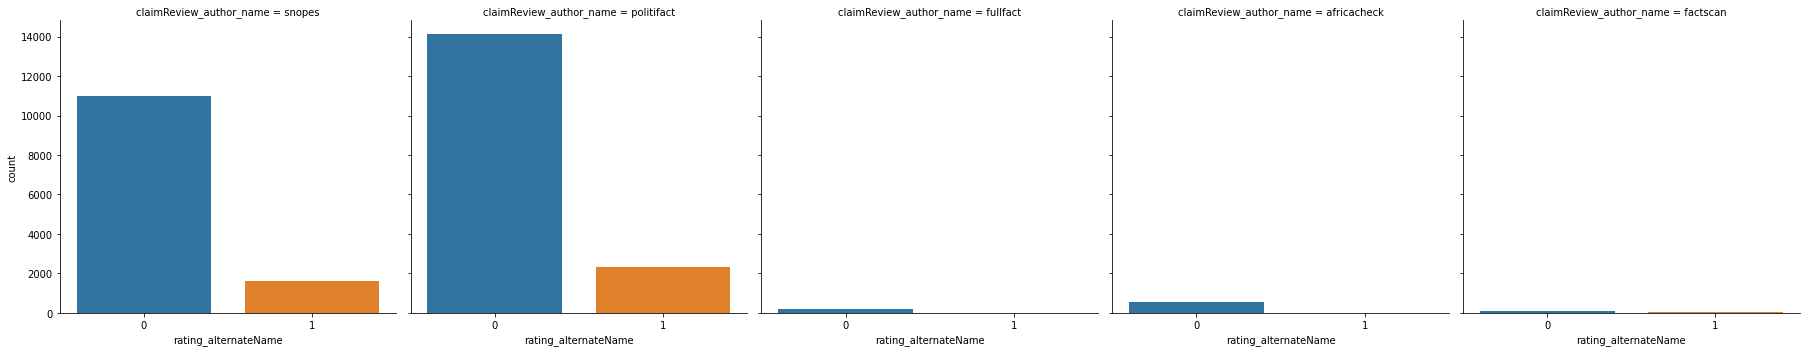

In [25]:
sns.catplot(x='rating_alternateName',col='claimReview_author_name',kind='count',data=df2)

In [26]:
categories_sorting = Counter(df2.extra_tags)
categories_sorting.most_common()

[('ASP Article', 4386),
 ('Economy', 1289),
 ('Health Care', 1170),
 ('supernatural', 1136),
 ('Candidate Biography', 854),
 ('Education', 850),
 ('Elections', 715),
 ('Crime', 625),
 ('Fake news', 575),
 ('Federal Budget', 545),
 ('donald trump', 532),
 ('Immigration', 513),
 ('Taxes', 494),
 ('Foreign Policy', 463),
 ('Abortion', 372),
 ('Energy', 357),
 ('Guns', 317),
 ('Corrections and Updates', 286),
 ('Campaign Finance', 285),
 ('State Budget', 280),
 ('Children', 276),
 ('Jobs', 268),
 ('Congress', 265),
 ('animals', 220),
 ('History', 217),
 ('Home', 210),
 ('Environment', 203),
 ('Deficit', 191),
 ('barack obama', 184),
 ('Climate Change', 174),
 ('Homeland Security', 165),
 ('Corporations', 155),
 ('Civil Rights', 150),
 ('Ethics', 140),
 ('Job Accomplishments', 140),
 ("['Home'", 139),
 ('Criminal Justice', 131),
 ('Debt', 128),
 ('City Government', 122),
 ('Bipartisanship', 120),
 ('Legal Issues', 119),
 ('Drugs', 111),
 ('Agriculture', 110),
 ('City Budget', 102),
 ('Trans

In [27]:
index = 0
while index < nbLignes:
    if len(df['extra_entities_keywords'][index]) > 2 :
        print(df['extra_entities_keywords'][index])
    index+=1

[{"id" : 4848272",""begin": 0,"end": 12,"entity": "Donald Trump","text": "donald trump","score": 0.79,"categories" : ["Living people","1946 births","20th-century American businesspeople","20th-century American writers","21st-century American businesspeople","21st-century American writers","American billionaires","American business writers","American casino industry businesspeople","American chief executives","American construction businesspeople","American cosmetics businesspeople","American education businesspeople","American fashion businesspeople","American game show hosts","American people of German descent","American people of Scottish descent","American Presbyterians","American real estate businesspeople","American reality television producers","American restaurateurs","American socialites","Businesspeople from Florida","Businesspeople from New York City","Businesspeople in the beverage industry","Conspiracy theorists","Fordham University alumni","New York Military Academy alumni

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[{"id" : 843491",""begin": 12,"end": 36,"entity": "Not Necessarily the News","text": "Not Necessarily The News","score": 0.50,"categories" : ["HBO network shows","American sketch comedy television shows","Satirical television programmes","Television series about television","1980s American television series","1983 American television series debuts","1990 American television series endings","American television series based on British television series","English-language television series","CableACE award winners"]}]
[{"id" : 843491",""begin": 12,"end": 36,"entity": "Not Necessarily the News","text": "Not Necessarily The News","score": 0.50,"categories" : ["HBO network shows","American sketch comedy television shows","Satirical television programmes","Television series about television","1980s American television series","1983 American television series debuts","1990 American television series endings","American television series based on British television series","English-language te

[{"id" : 5042706",""begin": 0,"end": 7,"entity": "Al Gore","text": "Al Gore","score": 0.70,"categories" : ["1948 births","Al Gore","American bloggers","American environmentalists","American military personnel of the Vietnam War","American Nobel laureates","American non-fiction environmental writers","American people of Scotch-Irish descent","American political writers","American war correspondents","Baptists from the United States","Businesspeople from Tennessee","Businesspeople from Washington, D.C.","Climate change environmentalists","Columbia University faculty","Democratic Party United States Senators","Democratic Party Vice Presidents of the United States","Democratic Party (United States) presidential nominees","Democratic Party (United States) vice presidential nominees","Directors of Apple Inc.","Emmy Award winners","Google employees","Gore family","Green thinkers","Harvard University alumni","Internet activism","Internet Hall of Fame inductees","Internet pioneers","Living peop

[{"id" : 677516",""begin": 10,"end": 30,"entity": "Negative campaigning","text": "Negative Campaigning","score": 0.46,"categories" : ["Election campaigning","Ethically disputed political practices","Political campaign techniques"]}]
[{"id" : 6639133",""begin": 0,"end": 7,"entity": "Economy","text": "Economy","score": 0.30,"categories" : ["Economic systems","Economics","Economies"]}]
[{"id" : 765",""begin": 0,"end": 15,"entity": "Abortion","text": "Abortion,Health","score": 0.48,"categories" : ["Abortion","Core issues in ethics","Gender studies","Fertility","Human reproduction","Ethically disputed practices"]}]
[{"id" : 261925",""begin": 0,"end": 11,"entity": "Health care","text": "Health Care","score": 0.34,"categories" : ["Health care","Primary care","Public services","Healthcare quality"]},{"id" : 463734",""begin": 12,"end": 25,"entity": "Public health","text": "Public Health","score": 0.37,"categories" : ["Public health","Health fields","Health economics","Health policy","Subjects t

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [28]:
print(df2.loc[(df2["rating_alternateName"] == 0) & (df2["extra_tags"] == "Health Care")])

      claimReview_author_name claimReview_source   extra_tags  \
1363                   snopes             snopes  Health Care   
15012              politifact         politifact  Health Care   
15017              politifact         politifact  Health Care   
15034              politifact         politifact  Health Care   
15046              politifact         politifact  Health Care   
...                       ...                ...          ...   
28982              politifact         politifact  Health Care   
29008              politifact         politifact  Health Care   
29054              politifact         politifact  Health Care   
29060              politifact         politifact  Health Care   
29115              politifact         politifact  Health Care   

      rating_alternateName                                claimReview_Cleaned  \
1363                     0     presid trump ban song feliz navidad white hous   
15012                    0  video captur strang apocalypt

**Visualisation des catégories**

Chaque assertion est taggée par une catégorie. Nous allons prendre les catégories qui reviennent le plus pour visualiser les valeurs des assertions qui leur sont reliées.

In [29]:
def get_n_most_common(n):
    count = Counter(df2.extra_tags)
    most_common = count.most_common(n)
    return most_common

On supprime la catégorie 'nan' :

In [30]:
#On enlève la première catégorie puisqu'on sait que c'est 'nan'
def get_n_categories_distribution(n):
    most_common = get_n_most_common(n)
    categories_distribution = most_common[1:len(most_common)]
    return categories_distribution

On extrait le nom des catégories :

In [31]:
def get_n_noms_categories(n):
    categories_distribution = get_n_categories_distribution(n)
    categories = [x[0] for x in categories_distribution];
    return categories

In [32]:
def get_dict_data_with_n_categories(n):
    categories = get_n_noms_categories(n)
    dict = {'category' : [],
        'faux/vrai' : []
    }
    
    nbLignes, nbColonnes = df2.shape
    
    idx = 0
    while idx < nbLignes:
        current_categorie = df2['extra_tags'][idx]
        if isinstance(current_categorie, str) and current_categorie:
            #print(idx, " : ", current_categorie)       
            if (current_categorie in categories):
                dict['category'].append(current_categorie)
                dict['faux/vrai'].append(df2['rating_alternateName'][idx])         
        idx+=1
    return dict

On veut pouvoir afficher les 5 catégories les plus retrouvées et afficher la distribution des classes qui leur est associée :

30239


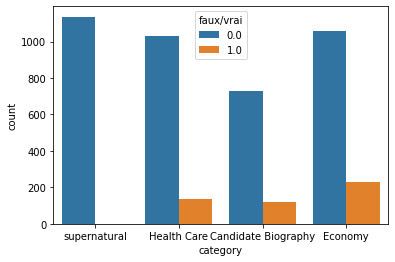

In [33]:
print(len(df2['extra_tags']))
dict = get_dict_data_with_n_categories(5)

categoriesDF = pd.DataFrame.from_dict(dict)

ax = sns.countplot(x="category", hue="faux/vrai", data=categoriesDF)

<H1> Classification </H1>

La phase de pré-traitement est maintenant terminée. Nous allons pouvoir sauvegarder notre dataset préparé et ainsi passer à la phase de classification.


In [34]:
df_majority = df2[df2.rating_alternateName==0]
df_minority = df2[df2.rating_alternateName==1]

df_majority_downsampled = resample(df_majority, replace = False,n_samples = 4594,random_state=123)
df_downsampled = pd.concat([df_majority_downsampled,df_minority])

df_downsampled.rating_alternateName.value_counts()
display(df_downsampled)
print(df_downsampled.shape)
print(df_downsampled[df2.rating_alternateName==1].count())

,claimReview_author_name,claimReview_source,extra_tags,rating_alternateName,claimReview_Cleaned,minimized_urls,fixed_entities,fixed_score_entities,fixed_subject
10348,snopes,snopes,naked,0,video captur strang apocalypt sound come sky a...,NaN,NaN,NaN,NaN
2156,snopes,snopes,antifa,0,support alexandria suggest eat babi combat cli...,snopes.com,Alexandria Ocasio-Cortez,0.56,NaN
1224,snopes,snopes,boy scouts of america,0,motorist fine nine hundr licens suspend three ...,snopes.com,NaN,NaN,NaN
6794,snopes,snopes,marilyn monroe,0,donald trump elect presid pope franci said los...,donotlink.com,Donald Trump,0.69,NaN
27338,politifact,politifact,Elections,0,scottwalk told firefight need worri act ten sa...,snopes.com,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
30220,factscan,factscan,CPC,1,got six billion opioid get rid scourg take cou...,openparliament.ca,Opioid,NaN,NaN
30222,factscan,factscan,Jobs,1,horribl law requir children separ parent cross...,cbc.ca,NaN,NaN,NaN
30230,factscan,factscan,genocide,1,irand ultim would guarante iran nuclear bomb c...,openparliament.ca,Iran,NaN,Iran
30231,factscan,factscan,Climate Change,1,perpetr school shoot drug mani case mani young...,cbc.ca,Methylphenidate,NaN,NaN


(8606, 9)
claimReview_author_name    4012
claimReview_source         4012
extra_tags                 4012
rating_alternateName       4012
claimReview_Cleaned        4012
minimized_urls             4012
fixed_entities             4012
fixed_score_entities       4012
fixed_subject              4012
dtype: int64


/home/anas/Bureau/m1-aigle-s2/HMIN232M-DataScienceMethods/env/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


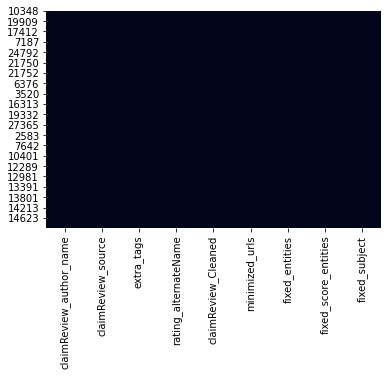

In [35]:
sns.heatmap(df_downsampled.isnull(), cbar=False)


In [36]:
#On met notre colonne de classe à la fin pour améliorer la lisibilité

df_downsampled = df_downsampled[[c for c in df_downsampled if c not in ['rating_alternateName']] + ['rating_alternateName']]

**Définition de y**

In [38]:
array = df_downsampled.values
y = array[:,8]
y=y.astype('int')

print("y = ")
display(y[:5])


y = 


array([0, 0, 0, 0, 0])

**Définition des features et de leur traitement respectif**

In [39]:
validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30

mapper = DataFrameMapper([
     ('claimReview_Cleaned', TfidfVectorizer()),
     ('claimReview_author_name', LabelEncoder()),
     ('claimReview_source', LabelEncoder()),
     ('extra_tags', LabelEncoder()),
     ('minimized_urls', LabelEncoder()),
     ('fixed_entities', LabelEncoder()),
     ('fixed_subject', LabelEncoder()),
      ])

features = mapper.fit_transform(df_downsampled)
print(type(features))

X_train,X_test,y_train,y_test=train_test_split(features, 
                                               y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)

<class 'numpy.ndarray'>


In [40]:
def printreport(exp, pred):
    print(pd.crosstab(exp, pred, rownames=['Actual'], colnames=['Predicted']))
 
    print('\n \n')
    print(classification_report(exp, pred))

clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
 
printreport(y_test, predicted)

Predicted     0     1
Actual               
0          1597  1624
1          1055  1749

 

              precision    recall  f1-score   support

           0       0.60      0.50      0.54      3221
           1       0.52      0.62      0.57      2804

    accuracy                           0.56      6025
   macro avg       0.56      0.56      0.56      6025
weighted avg       0.56      0.56      0.55      6025



In [41]:
seed=7

k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)
clf = GaussianNB()

scoring = 'accuracy'
t0 = time()
score = cross_val_score(clf, features, y, cv=k_fold, scoring=scoring)
print("Réalisé en %0.3fs" % (time() - t0))

print('Les différentes accuracy pour les 10 évaluations sont : \n',
      score,'\n')
print ('Accuracy moyenne : ',score.mean(), 
       ' standard deviation', score.std())

Réalisé en 8.314s
Les différentes accuracy pour les 10 évaluations sont : 
 [0.68873403 0.65969803 0.65156794 0.65969803 0.66898955 0.66782811
 0.66860465 0.70465116 0.63953488 0.6755814 ] 

Accuracy moyenne :  0.6684887772465765  standard deviation 0.01745792507612159


In [45]:
models = []
models.append(('LSVC', LinearSVC(max_iter=3000, dual = False)))
#models.append(('DTR', DecisionTreeRegressor()))
#models.append(('LR', LogisticRegression()))
#models.append(('SGD', SGDClassifier()))
#models.append(('RFC', RandomForestClassifier()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVC', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

In [46]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    start_time = time()
    cv_results = cross_val_score(model, features, y, cv=kfold, scoring=scoring)
    print (model.get_params())
    print ("Time pour",name," ",time() - start_time)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/anas/Bureau/m1-aigle-s2/HMIN232M-DataScienceMethods/env/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/anas/Bureau/m1-aigle-s2/HMIN232M-DataScienceMethods/env/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/anas/Bureau/m1-aigle-s2/HMIN232M-DataScienceMethods/env/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/anas/Bureau/m1-aigle-s2/HMIN232M-DataScienceMethods/env/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceW

KeyboardInterrupt: 

[Text(0, 0, 'LSVC'), Text(0, 0, 'NB'), Text(0, 0, 'XGB')]

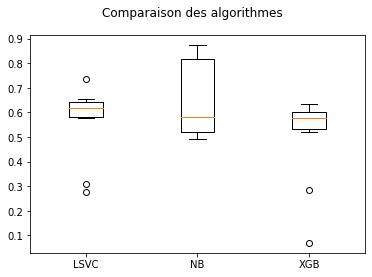

In [44]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

On fait une séléction sur le top 3 des algorithmes pour pouvoir optimiser leur paramètres


In [61]:
classifiers = {
    'LinearSVC':  LinearSVC(max_iter=3000, dual = False)
}


rand_classifiers = {
    'XGB': XGBClassifier()
}

params = {'LinearSVC': [{'C': [0.1, 1, 10, 100, 1000]}]}
#    {'gamma': [0.001, 0.01, 0.1, 1]}]

rand_params = {'XGB' : [{'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }]}

In [64]:
class Result:
     def __init__(self,name, score, parameters):
         self.name = name
         self.score = score
         self.parameters = parameters
     def __repr__(self):
         return repr((self.name, self.score, self.parameters))
        
def make_grid_search(classifiers, params):
    results = []
    for key,value in classifiers.items():
        gd_sr = GridSearchCV(estimator=value,  
                         param_grid=params[key],
                         scoring='accuracy',
                         cv=5,
                         n_jobs=-1,
                         iid=True, verbose = 41)
        #Verbose pour avoir des messages sur le déroulement
        #n_jobs = 1 car d'après la doc, si la val est > 1, le dataset est copié. 
        #On va éviter pour ne pas avoir de souci de mémoire
        gd_sr.fit(X_train, y_train)  
        RES=Result(key,gd_sr.best_score_,gd_sr.best_estimator_)
        results.append(RES)   
        return results

#Approche aléatoire de la recherche des meilleurs hyperparamètres
def make_random_search(classifiers, params, n_iter):
    results = []
    for key,value in classifiers.items():
        rand_sr = RandomizedSearchCV(estimator=value, 
                                     param_distributions = params[key], 
                                     random_state=1, 
                                     n_iter=n_iter, 
                                     cv=3, 
                                     n_jobs=-1,
                                     scoring='accuracy',
                                     iid=True,
                                     return_train_score=True, verbose=41)
        rand_sr.fit(X_train, y_train)  
        RES=Result(key,rand_sr.best_score_,rand_sr.best_estimator_)
        results.append(RES)  
        return results
        
#results = make_grid_search(classifiers, params)  
results = make_random_search(rand_classifiers, rand_params, 5)  

results=sorted(results, key=lambda RES: RES.score, reverse=True) 

print ('Le meilleur resultat : \n')
print ('Classifier : ',results[0].name, 
       ' score %0.2f' %results[0].score, 
       ' avec ',results[0].parameters,'\n')

print ('Tous les résultats : \n')
for result in results:
    print ('Classifier : ',result.name, 
           ' score %0.2f' %result.score, 
           ' avec ',result.parameters,'\n')




Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:    0.8s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done   3 out of  15 | elapsed:    0.8s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:    0.9s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   5 out of  15 | elapsed:    0.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:    0.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   7 out of  15 | elapsed:    0.9s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   9 out of  15 | elapsed:    0.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:    1.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  11 out of  15 | elapsed:    1.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapse

Le meilleur resultat : 

Classifier :  XGB  score 0.63  avec  XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8753198042323166, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.4421946960652949, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=795, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.43208030173540174,
              tree_method=None, validate_parameters=False, verbosity=None) 

Tous les résultats : 

Classifier :  XGB  score 0.63  avec  XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8753198042323166, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_cons

In [ ]:
"""pipeline_MNB = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

X=mydf.sample(nbsample)
display(X)
y = df_downsampled['rating_alternateName'].sample(nbsample)
y=y.astype('int')
display(y)



X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)

t0 = time()
pipeline_MNB.fit(X_train, y_train)
print("Fit réalisé en %0.3fs" % (time() - t0))

t0 = time()
result = pipeline_MNB.predict(X_test)
print("Prédiction réalisée en %0.3fs" % (time() - t0))

print('\n accuracy:',accuracy_score(result, y_test),'\n')

conf = confusion_matrix(y_test, result)
print ('\n matrice de confusion \n',conf)


print ('\n',classification_report(y_test, result))"""

In [ ]:

"""pipeline = Pipeline([('vect', TfidfVectorizer()),
                ('clf', SGDClassifier(loss='hinge', 
                                      penalty='l2',
                                      alpha=1e-3, 
                                      random_state=42, 
                                      max_iter=5, tol=None)),
               ])

array = df2.values[0:1000]

#print("Y :")
y= array[:,7]
#y=y.astype('int')
#display(y)

#print("X :")
X = array
nbLignesX, nbColonnesX = X.shape
#print(nbLignesX)

indexY = [7]
idx = 0
new_X = []
while idx < nbLignesX:
    new_X_i = np.delete(X[idx], indexY)
    new_X.append(new_X_i)
    idx+=1

#X=mydf.sample(8000)
#y=df_downsampled['rating_alternateName'].sample(8000)
#y=y.astype('int')
#np.unique(x)
display(X)
    

X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)


t0 = time()
pipeline.fit(X_train, y_train)
print("Fit réalisé en %0.3fs" % (time() - t0))

t0 = time()
result = pipeline.predict(X_test)
print("Prédiction réalisée en %0.3fs" % (time() - t0))

print('\n accuracy:',accuracy_score(result, y_test),'\n')


conf = confusion_matrix(y_test, result)
print ('\n matrice de confusion \n',conf)

print ('\n',classification_report(y_test, result))"""

In [ ]:
# Specification des pipelines
# programmation à optimiser par une fonction :)
"""pipeline_SGDC = Pipeline([('tfidf', TfidfVectorizer()),
                    ('clf', SGDClassifier())])


parameters_SGDC = [
    {'clf__max_iter': (5,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet')}
]

pipeline_DT = Pipeline([('tfidf', TfidfVectorizer()),
                   ('clf', DecisionTreeClassifier())])


#param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range = [1, 5, 8, 10]
parameters_DT = [
    {'clf__min_samples_leaf': param_range,
        'clf__criterion': ['gini', 'entropy'],
        'clf__max_depth': param_range,
        'clf__min_samples_split': param_range[1:]}
]


parameters_LR = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
pipeline_LR = Pipeline([('tfidf', TfidfVectorizer()),
                   ('clf', LogisticRegression())])

X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)


nb.fit(X_train, y_train)

# Creation des GridSearchCV avec les pipelines spécifiques

gs_SGDC = GridSearchCV(pipeline_SGDC, 
                       parameters_SGDC, 
                       cv=3,
                       n_jobs=-1, 
                       scoring='accuracy')

gs_DT = GridSearchCV(pipeline_DT, 
                     parameters_DT, 
                     cv=3,
                     n_jobs=-1, 
                     scoring='accuracy')

gs_DT = GridSearchCV(pipeline_LR, 
                     parameters_LR, 
                     cv=3,
                     n_jobs=-1, 
                     scoring='accuracy')




grids = [gs_SGDC, gs_DT, gd_sr]
#grids = [gs_SGDC, gs_DT]
grid_dict={0:'Linear classifiers', 1:'Decision Tree', 2:'Logistic Regression'}
#grid_dict={0:'Linear classifiers', 1:'Decision Tree'}

best_acc = 0.0
best_clf = 0.0
best_gs = ''

for idx,gs in enumerate(grids):
    print('\nClassifier: %s' % grid_dict[idx])
    t0 = time()
    gs.fit(X_train, y_train)
    print("Fit réalisé en %0.3fs" % (time() - t0))

    print('Meilleurs paramètres : %s' % gs.best_params_)

    print("Meilleur score d'accuracy sur l'entrainement: %.3f" % gs.best_score_)
    # Prediction sur le jeu de test avec les meilleurs paramètres
    t0 = time()
    result = gs.predict(X_test)
    print("Prédiction réalisée en %0.3fs" % (time() - t0))
    
    print("Score d'accuracy pour les meilleurs paramètres sur jeu de test : %.3f"  % accuracy_score(y_test, result))

    print ('\n matrice de confusion \n',confusion_matrix(y_test, result))

    print ('\n',classification_report(y_test, result))
    
    #Modele avec la meilleure accuracy sur le jeu de test
    if accuracy_score(y_test, result) > best_acc:
        best_acc = accuracy_score(y_test, result)
        best_gs = gs
        best_clf = idx
        
        
        
print('\nClassifier avec la meilleur accuracy sur le jeu de test\n',
      grid_dict[best_clf])    """    

Sauvegarde de notre meilleur modèle :

In [ ]:
"""pipeline = Pipeline([('vect', TfidfVectorizer(preprocessor=clean_text)),
                ('clf', SGDClassifier(loss='hinge', 
                                      penalty='l2',
                                      alpha=1e-05, 
                                      random_state=42, 
                                      max_iter=5, 
                                      tol=None)),
               ])


X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)


t0 = time()
print ("Lancement du fit \n")
pipeline.fit(X_train, y_train)
print("Fit réalisé en %0.3fs" % (time() - t0))

t0 = time()
print ("Lancement de la prédiction \n")
result = pipeline.predict(X_test)
print("Prédiction réalisée en %0.3fs" % (time() - t0))

print('\n accuracy:',accuracy_score(result, y_test),'\n')

conf = confusion_matrix(y_test, result)
print ('\n matrice de confusion \n',conf)



print ('\n',classification_report(y_test, result))

print("\nSauvegarde du pipeline grid search") 
filename = 'thebestone.pkl'
pickle.dump(pipeline, open(filename, 'wb'))"""